In [4]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = "middle_aged_adults.csv"  # Update if needed
df = pd.read_csv(file_path)

# Drop any missing values
df.dropna(inplace=True)

# Assume the last column is the target (modify if necessary)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Convert categorical target variable (if needed)
if y.dtype == 'O':  # Check if target is categorical
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y = le.fit_transform(y)  # Convert categories to integers

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Choose the model
model_type = "mlp"  # Change to "xgboost" if you want to run XGBoost

if model_type == "mlp":
    # Define the Neural Network model
    class MLP(nn.Module):
        def __init__(self, input_size):
            super(MLP, self).__init__()
            self.fc1 = nn.Linear(input_size, 64)
            self.fc2 = nn.Linear(64, 32)
            self.fc3 = nn.Linear(32, 1)
            self.relu = nn.ReLU()
            self.sigmoid = nn.Sigmoid()

        def forward(self, x):
            x = self.relu(self.fc1(x))
            x = self.relu(self.fc2(x))
            x = self.sigmoid(self.fc3(x))
            return x

    # Convert data to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

    # Initialize the model, loss function, and optimizer
    model = MLP(input_size=X.shape[1])
    criterion = nn.BCELoss()  # Binary Cross Entropy for classification
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    epochs = 100
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

        if (epoch+1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

    # Evaluate the model
    with torch.no_grad():
        predictions = model(X_test_tensor)
        predicted_labels = (predictions.numpy() > 0.5).astype(int)
        accuracy = accuracy_score(y_test, predicted_labels)
    
    print(f"MLP Accuracy: {accuracy:.4f}")

elif model_type == "xgboost":
    # Train the XGBoost model
    xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
    xgb_model.fit(X_train, y_train)

    # Make predictions
    y_pred = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"XGBoost Accuracy: {accuracy:.4f}")

else:
    print("Invalid model_type. Choose either 'mlp' or 'xgboost'.")


FileNotFoundError: [Errno 2] No such file or directory: 'middle_aged_adults.csv'

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = "middle_aged_adults.csv"  # Update if needed
df = pd.read_csv(file_path)

# Drop any missing values
df.dropna(inplace=True)

# Assume the last column is the target (modify if necessary)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Convert categorical target variable (if needed)
if y.dtype == 'O':  # Check if target is categorical
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y = le.fit_transform(y)  # Convert categories to integers

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Choose the model
model_type = "xgboost"  # Change to "xgboost" if you want to run XGBoost

if model_type == "mlp":
    # Define the Neural Network model
    class MLP(nn.Module):
        def __init__(self, input_size):
            super(MLP, self).__init__()
            self.fc1 = nn.Linear(input_size, 64)
            self.fc2 = nn.Linear(64, 32)
            self.fc3 = nn.Linear(32, 1)
            self.relu = nn.ReLU()
            self.sigmoid = nn.Sigmoid()

        def forward(self, x):
            x = self.relu(self.fc1(x))
            x = self.relu(self.fc2(x))
            x = self.sigmoid(self.fc3(x))
            return x

    # Convert data to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

    # Initialize the model, loss function, and optimizer
    model = MLP(input_size=X.shape[1])
    criterion = nn.BCELoss()  # Binary Cross Entropy for classification
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    epochs = 100
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()

        if (epoch+1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

    # Evaluate the model
    with torch.no_grad():
        predictions = model(X_test_tensor)
        predicted_labels = (predictions.numpy() > 0.5).astype(int)
        accuracy = accuracy_score(y_test, predicted_labels)
    
    print(f"MLP Accuracy: {accuracy:.4f}")

elif model_type == "xgboost":
    # Train the XGBoost model
    xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")
    xgb_model.fit(X_train, y_train)

    # Make predictions
    y_pred = xgb_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"XGBoost Accuracy: {accuracy:.4f}")

else:
    print("Invalid model_type. Choose either 'mlp' or 'xgboost'.")


XGBoost Accuracy: 0.8164


d:\Rreserch work\fedenvioremnt\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [13:01:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
pip install optuna


  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.1 MB ? eta -:--:--
   -------------- ------------------------- 0.8/2.1 MB 2.2 MB/s eta 0:00:01
   ------------------------ --------------- 1.3/2.1 MB 2.3 MB/s eta 0:00:01
   ----------------------------- ---------- 1.6/2.1 MB 2.3 MB/s eta 0:00:01
   ---------------------------------- ----- 1.8/2.1 MB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 2.1 MB/s eta 0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = "middle_aged_adults.csv"  # Update this path if needed
df = pd.read_csv(file_path)

# Assuming the last column is the target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define MLP Model with Dynamic Hyperparameters
class MLP(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Define objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    hidden1 = trial.suggest_int("hidden1", 32, 128, step=16)
    hidden2 = trial.suggest_int("hidden2", 16, 64, step=16)
    lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    
    # Model
    model = MLP(X_train.shape[1], hidden1, hidden2)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # DataLoader for mini-batch training
    train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    # Training loop
    num_epochs = 50
    for epoch in range(num_epochs):
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
    
    # Evaluate accuracy
    with torch.no_grad():
        predictions = model(X_test_tensor)
        predictions = (predictions > 0.5).float()
        accuracy = (predictions == y_test_tensor).float().mean().item()
    
    return accuracy  # Optuna maximizes this

# Run Optuna hyperparameter tuning
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

# Print best hyperparameters
print("Best hyperparameters:", study.best_params)

# Train final model with best params
best_params = study.best_params
final_model = MLP(X_train.shape[1], best_params["hidden1"], best_params["hidden2"])
criterion = nn.BCELoss()
optimizer = optim.Adam(final_model.parameters(), lr=best_params["lr"])

train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=best_params["batch_size"], shuffle=True)

for epoch in range(100):  # Final training with 100 epochs
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = final_model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/100], Loss: {loss.item():.4f}")

# Evaluate final model
with torch.no_grad():
    final_predictions = final_model(X_test_tensor)
    final_predictions = (final_predictions > 0.5).float()
    final_accuracy = (final_predictions == y_test_tensor).float().mean().item()

print(f"Final MLP Accuracy after tuning: {final_accuracy:.4f}")


[I 2025-03-14 13:05:31,382] A new study created in memory with name: no-name-550fb041-2f33-4ca7-a5fc-f4279cf11031


C:\Users\Ashan\AppData\Local\Temp\ipykernel_10640\1923077742.py:53: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
[I 2025-03-14 13:05:34,984] Trial 0 finished with value: 0.8280467391014099 and parameters: {'hidden1': 64, 'hidden2': 32, 'lr': 0.0007998724473569885, 'batch_size': 64}. Best is trial 0 with value: 0.8280467391014099.
[I 2025-03-14 13:05:40,592] Trial 1 finished with value: 0.8347245454788208 and parameters: {'hidden1': 112, 'hidden2': 64, 'lr': 0.00015843632750021233, 'batch_size': 32}. Best is trial 1 with value: 0.8347245454788208.
[I 2025-03-14 13:05:49,905] Trial 2 finished with value: 0.7879799604415894 and parameters: {'hidden1': 128, 'hidden2': 32, 'lr': 0.0008661993201756542, 'batch_size': 16}. Best is trial 1 with value: 0.8347245454788208.
[I 2025-03-14 13:

Best hyperparameters: {'hidden1': 80, 'hidden2': 48, 'lr': 0.00019243426051715194, 'batch_size': 32}
Epoch [10/100], Loss: 0.4626
Epoch [20/100], Loss: 0.4279
Epoch [30/100], Loss: 0.2997
Epoch [40/100], Loss: 0.3707
Epoch [50/100], Loss: 0.2646
Epoch [60/100], Loss: 0.2283
Epoch [70/100], Loss: 0.1460
Epoch [80/100], Loss: 0.3698
Epoch [90/100], Loss: 0.3106
Epoch [100/100], Loss: 0.2638
Final MLP Accuracy after tuning: 0.8280


In [ ]:
pip install imbalanced-learn optuna


In [ ]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load dataset
file_path = "middle_aged_adults.csv"  # Update this path if needed
df = pd.read_csv(file_path)

# Assuming the last column is the target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Check class distribution
print("Before balancing:", Counter(y))

# Apply SMOTE for class balancing
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("After balancing:", Counter(y_resampled))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define MLP Model with Dynamic Hyperparameters
class MLP(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Define objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    hidden1 = trial.suggest_int("hidden1", 32, 128, step=16)
    hidden2 = trial.suggest_int("hidden2", 16, 64, step=16)
    lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    
    # Model
    model = MLP(X_train.shape[1], hidden1, hidden2)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # DataLoader for mini-batch training
    train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    # Training loop
    num_epochs = 50
    for epoch in range(num_epochs):
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
    
    # Evaluate accuracy
    with torch.no_grad():
        predictions = model(X_test_tensor)
        predictions = (predictions > 0.5).float()
        accuracy = (predictions == y_test_tensor).float().mean().item()
    
    return accuracy  # Optuna maximizes this

# Run Optuna hyperparameter tuning
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

# Print best hyperparameters
print("Best hyperparameters:", study.best_params)

# Train final model with best params
best_params = study.best_params
final_model = MLP(X_train.shape[1], best_params["hidden1"], best_params["hidden2"])
criterion = nn.BCELoss()
optimizer = optim.Adam(final_model.parameters(), lr=best_params["lr"])

train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=best_params["batch_size"], shuffle=True)

for epoch in range(100):  # Final training with 100 epochs
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = final_model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/100], Loss: {loss.item():.4f}")

# Evaluate final model
with torch.no_grad():
    final_predictions = final_model(X_test_tensor)
    final_predictions = (final_predictions > 0.5).float()
    final_accuracy = (final_predictions == y_test_tensor).float().mean().item()

print(f"Final MLP Accuracy after tuning with SMOTE: {final_accuracy:.4f}")


[I 2025-03-14 13:09:25,458] A new study created in memory with name: no-name-4e882d21-753e-433b-a5cf-1778b95b94c6


Before balancing: Counter({0: 2564, 1: 430})
After balancing: Counter({0: 2564, 1: 2564})


C:\Users\Ashan\AppData\Local\Temp\ipykernel_10640\693101200.py:64: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
[I 2025-03-14 13:09:41,900] Trial 0 finished with value: 0.8450292348861694 and parameters: {'hidden1': 32, 'hidden2': 16, 'lr': 0.007110457887160656, 'batch_size': 16}. Best is trial 0 with value: 0.8450292348861694.
[I 2025-03-14 13:09:50,762] Trial 1 finished with value: 0.8567251563072205 and parameters: {'hidden1': 96, 'hidden2': 16, 'lr': 0.009023019092899487, 'batch_size': 32}. Best is trial 1 with value: 0.8567251563072205.
[I 2025-03-14 13:09:59,840] Trial 2 finished with value: 0.8625730872154236 and parameters: {'hidden1': 64, 'hidden2': 32, 'lr': 0.0022896594661317013, 'batch_size': 32}. Best is trial 2 with value: 0.8625730872154236.
[I 2025-03-14 13:10:05,

Best hyperparameters: {'hidden1': 64, 'hidden2': 64, 'lr': 0.005453124073130615, 'batch_size': 64}
Epoch [10/100], Loss: 0.3690
Epoch [20/100], Loss: 0.0779
Epoch [30/100], Loss: 0.0836
Epoch [40/100], Loss: 0.0087
Epoch [50/100], Loss: 0.0088
Epoch [60/100], Loss: 0.0004
Epoch [70/100], Loss: 0.1102
Epoch [80/100], Loss: 0.0061
Epoch [90/100], Loss: 0.0051
Epoch [100/100], Loss: 0.0008
Final MLP Accuracy after tuning with SMOTE: 0.9064


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class MLP(nn.Module):
    def __init__(self, input_size, hidden1=64, hidden2=64):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.sigmoid(self.fc3(x))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Load datasets
datasets = ["middle_aged_adults.csv", "older_adults.csv", "young_adults.csv"]
dataframes = [pd.read_csv(file) for file in datasets]

#Store preprocessed data
preprocessed_data = []

for i, df in enumerate(dataframes):
    print(f"Processing Dataset {i+1}...")
    
    # Separate features (X) and target (y)
    X = df.iloc[:, :-1].values  # Features
    y = df.iloc[:, -1].values   # Target variable

    # Print original class distribution
    unique, counts = np.unique(y, return_counts=True)
    print(f"Original class distribution: {dict(zip(unique, counts))}")

    # Apply SMOTE to balance the classes
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Print new class distribution
    unique, counts = np.unique(y_resampled, return_counts=True)
    print(f"Balanced class distribution: {dict(zip(unique, counts))}\n")

    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_resampled)

    # Split into training and testing sets (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

    # Store the processed dataset
    preprocessed_data.append((X_train, X_test, y_train, y_test))

print("All datasets successfully preprocessed!")

Processing Dataset 1...
Original class distribution: {0: 2564, 1: 430}
Balanced class distribution: {0: 2564, 1: 2564}

Processing Dataset 2...
Original class distribution: {0: 499, 1: 191}
Balanced class distribution: {0: 499, 1: 499}

Processing Dataset 3...
Original class distribution: {0: 533, 1: 23}
Balanced class distribution: {0: 533, 1: 533}

All datasets successfully preprocessed!


In [ ]:
from sklearn.model_selection import ParameterGrid
from torch.utils.data import DataLoader, TensorDataset

# Hyperparameter grid search
param_grid = {
    "hidden1": [32, 64, 128],
    "hidden2": [32, 64, 128],
    "lr": [0.001, 0.005, 0.01],
    "batch_size": [32, 64, 128]
}

# Convert to list of dictionaries for iteration
param_combinations = list(ParameterGrid(param_grid))

best_model = None
best_accuracy = 0.0
best_params = {}

for params in param_combinations:
    total_accuracy = 0.0
    
    for i, (X_train, X_test, y_train, y_test) in enumerate(preprocessed_data):
        # Convert to tensors
        X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
        y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
        X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
        y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

        train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=params["batch_size"], shuffle=True)
        test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=params["batch_size"])

        # Train model
        model = MLP(X_train.shape[1], hidden1=params["hidden1"], hidden2=params["hidden2"])
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=params["lr"])
        
        # Training loop
        for epoch in range(5):  # Fewer epochs for faster tuning
            model.train()
            for X_batch, y_batch in train_loader:
                optimizer.zero_grad()
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                loss.backward()
                optimizer.step()

        # Evaluate
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                predictions = (outputs > 0.5).float()
                correct += (predictions == y_batch).sum().item()
                total += y_batch.size(0)

        accuracy = correct / total
        total_accuracy += accuracy

    # Average accuracy across datasets
    avg_accuracy = total_accuracy / len(preprocessed_data)

    if avg_accuracy > best_accuracy:
        best_accuracy = avg_accuracy
        best_params = params
        best_model = model

print(f"Best MLP Model: {best_params} with Accuracy: {best_accuracy:.4f}")


Best MLP Model: {'batch_size': 32, 'hidden1': 128, 'hidden2': 128, 'lr': 0.01} with Accuracy: 0.8281


In [ ]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load dataset
file_path = "older_adults.csv"  # Update this path if needed
df = pd.read_csv(file_path)

# Assuming the last column is the target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Check class distribution
print("Before balancing:", Counter(y))

# Apply SMOTE for class balancing
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("After balancing:", Counter(y_resampled))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define MLP Model with Dynamic Hyperparameters
class MLP(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Define objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    hidden1 = trial.suggest_int("hidden1", 32, 128, step=16)
    hidden2 = trial.suggest_int("hidden2", 16, 64, step=16)
    lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    
    # Model
    model = MLP(X_train.shape[1], hidden1, hidden2)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # DataLoader for mini-batch training
    train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    # Training loop
    num_epochs = 50
    for epoch in range(num_epochs):
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
    
    # Evaluate accuracy
    with torch.no_grad():
        predictions = model(X_test_tensor)
        predictions = (predictions > 0.5).float()
        accuracy = (predictions == y_test_tensor).float().mean().item()
    
    return accuracy  # Optuna maximizes this

# Run Optuna hyperparameter tuning
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

# Print best hyperparameters
print("Best hyperparameters:", study.best_params)

# Train final model with best params
best_params = study.best_params
final_model = MLP(X_train.shape[1], best_params["hidden1"], best_params["hidden2"])
criterion = nn.BCELoss()
optimizer = optim.Adam(final_model.parameters(), lr=best_params["lr"])

train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=best_params["batch_size"], shuffle=True)

for epoch in range(100):  # Final training with 100 epochs
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = final_model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/100], Loss: {loss.item():.4f}")

# Evaluate final model
with torch.no_grad():
    final_predictions = final_model(X_test_tensor)
    final_predictions = (final_predictions > 0.5).float()
    final_accuracy = (final_predictions == y_test_tensor).float().mean().item()

print(f"Final MLP Accuracy after tuning with SMOTE: {final_accuracy:.4f}")


[I 2025-03-14 14:17:04,287] A new study created in memory with name: no-name-c8b9d2ab-94a9-4f95-b7b3-ab519f731486


Before balancing: Counter({0: 499, 1: 191})
After balancing: Counter({1: 499, 0: 499})


C:\Users\Ashan\AppData\Local\Temp\ipykernel_24276\1421280807.py:64: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
[I 2025-03-14 14:17:06,261] Trial 0 finished with value: 0.6399999856948853 and parameters: {'hidden1': 48, 'hidden2': 32, 'lr': 0.00023943946868570248, 'batch_size': 32}. Best is trial 0 with value: 0.6399999856948853.
[I 2025-03-14 14:17:09,229] Trial 1 finished with value: 0.8149999976158142 and parameters: {'hidden1': 32, 'hidden2': 16, 'lr': 0.006529272220945926, 'batch_size': 16}. Best is trial 1 with value: 0.8149999976158142.
[I 2025-03-14 14:17:10,976] Trial 2 finished with value: 0.800000011920929 and parameters: {'hidden1': 112, 'hidden2': 32, 'lr': 0.0048608655057592355, 'batch_size': 32}. Best is trial 1 with value: 0.8149999976158142.
[I 2025-03-14 14:17:

Best hyperparameters: {'hidden1': 96, 'hidden2': 64, 'lr': 0.00673814875918385, 'batch_size': 32}
Epoch [10/100], Loss: 0.3396
Epoch [20/100], Loss: 0.1211
Epoch [30/100], Loss: 0.0073
Epoch [40/100], Loss: 0.0045
Epoch [50/100], Loss: 0.0018
Epoch [60/100], Loss: 0.0009
Epoch [70/100], Loss: 0.0005
Epoch [80/100], Loss: 0.0002
Epoch [90/100], Loss: 0.0002
Epoch [100/100], Loss: 0.0001
Final MLP Accuracy after tuning with SMOTE: 0.8350


In [ ]:
import optuna
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load dataset
file_path = "young_adults.csv"  # Update this path if needed
df = pd.read_csv(file_path)

# Assuming the last column is the target variable
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Check class distribution
print("Before balancing:", Counter(y))

# Apply SMOTE for class balancing
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("After balancing:", Counter(y_resampled))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define MLP Model with Dynamic Hyperparameters
class MLP(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.fc2 = nn.Linear(hidden1, hidden2)
        self.fc3 = nn.Linear(hidden2, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Define objective function for Optuna
def objective(trial):
    # Suggest hyperparameters
    hidden1 = trial.suggest_int("hidden1", 32, 128, step=16)
    hidden2 = trial.suggest_int("hidden2", 16, 64, step=16)
    lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    
    # Model
    model = MLP(X_train.shape[1], hidden1, hidden2)
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    # DataLoader for mini-batch training
    train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    
    # Training loop
    num_epochs = 50
    for epoch in range(num_epochs):
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
    
    # Evaluate accuracy
    with torch.no_grad():
        predictions = model(X_test_tensor)
        predictions = (predictions > 0.5).float()
        accuracy = (predictions == y_test_tensor).float().mean().item()
    
    return accuracy  # Optuna maximizes this

# Run Optuna hyperparameter tuning
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

# Print best hyperparameters
print("Best hyperparameters:", study.best_params)

# Train final model with best params
best_params = study.best_params
final_model = MLP(X_train.shape[1], best_params["hidden1"], best_params["hidden2"])
criterion = nn.BCELoss()
optimizer = optim.Adam(final_model.parameters(), lr=best_params["lr"])

train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=best_params["batch_size"], shuffle=True)

for epoch in range(100):  # Final training with 100 epochs
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = final_model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/100], Loss: {loss.item():.4f}")

# Evaluate final model
with torch.no_grad():
    final_predictions = final_model(X_test_tensor)
    final_predictions = (final_predictions > 0.5).float()
    final_accuracy = (final_predictions == y_test_tensor).float().mean().item()

print(f"Final MLP Accuracy after tuning with SMOTE: {final_accuracy:.4f}")


[I 2025-03-14 14:18:46,285] A new study created in memory with name: no-name-9496025c-46cf-4044-96f8-1123485ffc05


Before balancing: Counter({0: 533, 1: 23})
After balancing: Counter({0: 533, 1: 533})


C:\Users\Ashan\AppData\Local\Temp\ipykernel_24276\2212971989.py:64: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform("lr", 1e-4, 1e-2)
[I 2025-03-14 14:18:49,759] Trial 0 finished with value: 0.9485981464385986 and parameters: {'hidden1': 112, 'hidden2': 16, 'lr': 0.00014787666618286288, 'batch_size': 16}. Best is trial 0 with value: 0.9485981464385986.
[I 2025-03-14 14:18:53,126] Trial 1 finished with value: 0.9766355156898499 and parameters: {'hidden1': 48, 'hidden2': 16, 'lr': 0.005860133293648767, 'batch_size': 16}. Best is trial 1 with value: 0.9766355156898499.
[I 2025-03-14 14:18:56,609] Trial 2 finished with value: 0.9719626307487488 and parameters: {'hidden1': 128, 'hidden2': 48, 'lr': 0.0005851137306128345, 'batch_size': 16}. Best is trial 1 with value: 0.9766355156898499.
[I 2025-03-14 14:1

Best hyperparameters: {'hidden1': 96, 'hidden2': 16, 'lr': 0.0027622939904452734, 'batch_size': 64}
Epoch [10/100], Loss: 0.1322
Epoch [20/100], Loss: 0.0185
Epoch [30/100], Loss: 0.0301
Epoch [40/100], Loss: 0.0067
Epoch [50/100], Loss: 0.0036
Epoch [60/100], Loss: 0.0018
Epoch [70/100], Loss: 0.0013
Epoch [80/100], Loss: 0.0008
Epoch [90/100], Loss: 0.0003
Epoch [100/100], Loss: 0.0003
Final MLP Accuracy after tuning with SMOTE: 0.9673


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load and combine datasets
def load_datasets():
    dataset1 = pd.read_csv('middle_aged_adults.csv')
    dataset2 = pd.read_csv('older_adults.csv')
    dataset3 = pd.read_csv('young_adults.csv')
    combined_data = pd.concat([dataset1, dataset2, dataset3], axis=0)
    return combined_data

# Load data
data = load_datasets()
X = data.drop(columns=['TenYearCHD'])
y = data['TenYearCHD']

# Feature selection using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
feature_importances = rf.feature_importances_

# Select top 10 most important features
N = 10
important_features = X.columns[feature_importances.argsort()[-N:]]
X_selected = X[important_features]

# Apply ADASYN for balancing
X_resampled, y_resampled = ADASYN().fit_resample(X_selected, y)

# Split data (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Convert to tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_val_tensor = torch.tensor(X_val.values, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

# Create DataLoaders
batch_size = 128
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val_tensor, y_val_tensor), batch_size=batch_size, shuffle=False)

# Define the MLP Model
class MLP(nn.Module):
    def __init__(self, input_size, hidden1, hidden2, hidden3, hidden4, output_size, dropout_prob=0.2):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1)
        self.bn1 = nn.BatchNorm1d(hidden1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_prob)

        self.fc2 = nn.Linear(hidden1, hidden2)
        self.bn2 = nn.BatchNorm1d(hidden2)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_prob)

        self.fc3 = nn.Linear(hidden2, hidden3)
        self.bn3 = nn.BatchNorm1d(hidden3)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(dropout_prob)

        self.fc4 = nn.Linear(hidden3, hidden4)  # NEW LAYER
        self.bn4 = nn.BatchNorm1d(hidden4)
        self.relu4 = nn.ReLU()
        self.dropout4 = nn.Dropout(dropout_prob)

        self.fc5 = nn.Linear(hidden4, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.dropout3(x)

        x = self.fc4(x)
        x = self.bn4(x)
        x = self.relu4(x)
        x = self.dropout4(x)

        x = self.fc5(x)
        return x

# Define new hyperparameters
input_size = X_train.shape[1]
hidden1, hidden2, hidden3, hidden4 = 512, 512, 256, 128  # Added new layer
output_size = 2
learning_rate = 0.0008
epochs = 300

# Initialize model, loss, optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP(input_size, hidden1, hidden2, hidden3, hidden4, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=5e-4)  # L2 regularization

# Learning rate scheduler
scheduler = torch.optim.lr_scheduler.CyclicLR(
    optimizer, 
    base_lr=0.0001,  
    max_lr=0.001,  
    step_size_up=len(train_loader) * 10,  # Update over 10 epochs
    mode='triangular'
)

scheduler2 = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=20)

# Training loop with validation accuracy tracking
best_val_acc = 0.0

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    for batch in train_loader:
        inputs, labels = batch
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()
        train_loss += loss.item()

    # Validation step
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in val_loader:
            inputs, labels = batch
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    val_acc = correct / total  # Compute validation accuracy
    scheduler2.step(val_acc)  # Update ReduceLROnPlateau

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), "best_model.pth")  # Save best model

    # Print progress every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {train_loss/len(train_loader):.4f}, LR: {scheduler.get_last_lr()[0]:.6f}, Val Accuracy: {val_acc:.4f}')

# Load the best model for final evaluation
model.load_state_dict(torch.load("best_model.pth"))
print(f'Best Validation Accuracy: {best_val_acc:.4f}')


FileNotFoundError: [Errno 2] No such file or directory: 'middle_aged_adults.csv'

In [ ]:
pip install ctgan


   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/1.9 MB 3.4 MB/s eta 0:00:01
   --------------------------- ------------ 1.3/1.9 MB 3.2 MB/s eta 0:00:01
   -------------------------------- ------- 1.6/1.9 MB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 1.9/1.9 MB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import torch
from sklearn.metrics import roc_auc_score, precision_score, accuracy_score

# Ensure model is in evaluation mode
model.eval()

# Lists to store true labels, predicted probabilities, and predicted classes
y_true = []
y_scores = []
y_preds = []

# Disable gradient computation for evaluation
with torch.no_grad():
    for batch in val_loader:
        inputs, labels = batch
        outputs = model(inputs)

        # Convert logits to probabilities
        probabilities = torch.softmax(outputs, dim=1)[:, 1]  # Get probability for class 1
        predictions = torch.argmax(outputs, dim=1)  # Get predicted class (0 or 1)

        # Store values
        y_scores.extend(probabilities.cpu().numpy())
        y_preds.extend(predictions.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Compute evaluation metrics
roc_auc = roc_auc_score(y_true, y_scores)
precision = precision_score(y_true, y_preds)
accuracy = accuracy_score(y_true, y_preds)

# Print results
print(f'ROC-AUC Score: {roc_auc:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Accuracy: {accuracy:.4f}')


ROC-AUC Score: 0.9588
Precision: 0.8557
Accuracy: 0.9035


In [ ]:
!pip install matplotlib seaborn

  Using cached matplotlib-3.10.1-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.1-cp310-cp310-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp310-cp310-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.1-cp310-cp310-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached contourpy-1.3.1-cp310-cp310-win_amd64.whl (218 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp310-cp310-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp310-cp310-win_amd64.whl (71 kB)
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)


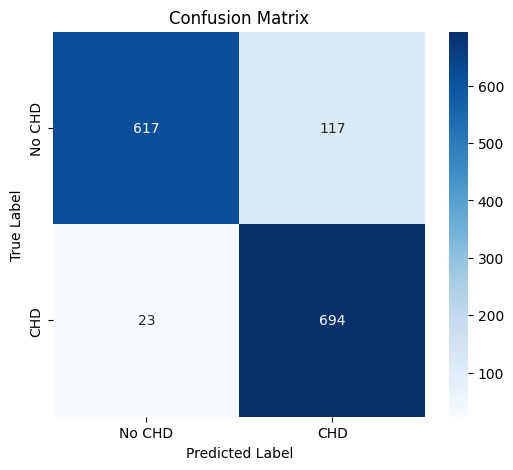

Recall: 0.9679


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Set model to evaluation mode
model.eval()

# Make predictions on validation set
y_true = []
y_pred = []

with torch.no_grad():
    for batch in val_loader:
        inputs, labels = batch
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        y_true.extend(labels.tolist())
        y_pred.extend(predicted.tolist())

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No CHD", "CHD"], yticklabels=["No CHD", "CHD"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



Updated Evaluation Metrics:
ROC-AUC Score: 0.9588
Precision: 0.8430
Recall: 0.9735
Accuracy: 0.8973


C:\Users\Ashan\AppData\Local\Temp\ipykernel_23544\3657467964.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_model.pth"))


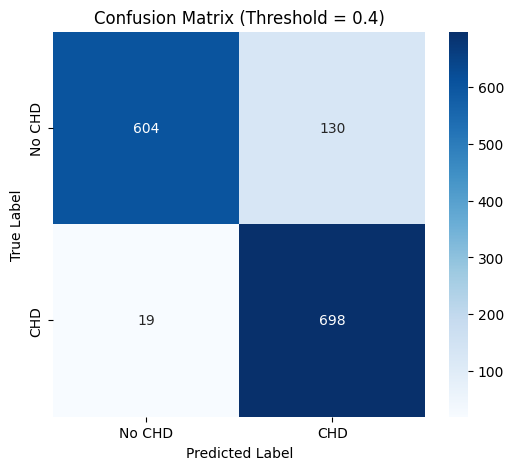

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score
import seaborn as sns

# Load the best trained model
model.load_state_dict(torch.load("best_model.pth"))
model.eval()

# Collect predictions
y_true = []
y_probs = []

with torch.no_grad():
    for batch in val_loader:
        inputs, labels = batch
        outputs = model(inputs)
        
        probs = torch.softmax(outputs, dim=1)[:, 1]  # Get probability for CHD class
        y_probs.extend(probs.cpu().numpy())  # Convert to NumPy for evaluation
        y_true.extend(labels.cpu().numpy())

# Convert lists to arrays
y_true = np.array(y_true)
y_probs = np.array(y_probs)

# Apply new threshold to make final predictions
y_pred = (y_probs > threshold).astype(int)

# Compute updated metrics
roc_auc = roc_auc_score(y_true, y_probs)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
accuracy = np.mean(y_pred == y_true)

# Print classification report
print("\nUpdated Evaluation Metrics:")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Accuracy: {accuracy:.4f}")

# Generate Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No CHD", "CHD"], yticklabels=["No CHD", "CHD"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Threshold = 0.4)")
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

# Calculate metrics
roc_auc = roc_auc_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

# Print results
print(f"ROC-AUC Score: {roc_auc:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")


ROC-AUC Score: 0.9043
F1 Score: 0.9084
Precision: 0.8557
Recall: 0.9679


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture

# Load the dataset
file_path = "framinghamdataset.csv"  # Change to your actual file path
df = pd.read_csv(file_path)

# Drop rows with missing values
df_cleaned = df.dropna()

# Normalize numerical features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_cleaned)

# Convert to numpy array
data_array = np.array(scaled_data)

# Train a Gaussian Mixture Model (GMM) to generate synthetic data
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(data_array)

# Generate synthetic samples
synthetic_data = gmm.sample(n_samples=len(df_cleaned))[0]

# Convert synthetic data back to original scale
synthetic_data = scaler.inverse_transform(synthetic_data)

# Create a DataFrame
synthetic_df = pd.DataFrame(synthetic_data, columns=df_cleaned.columns)

# Save the new dataset
synthetic_file_path = "synthetic_framingham.csv"
synthetic_df.to_csv(synthetic_file_path, index=False)

print(f"Synthetic dataset saved to {synthetic_file_path}")


d:\Rreserch work\fedenvioremnt\.venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\Rreserch work\fedenvioremnt\.venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\Ashan\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\Ashan\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Ashan\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 1456, in _execute_c

Synthetic dataset saved to synthetic_framingham.csv


Original Dataset Shape: (4240, 16)
Synthetic Dataset Shape: (4240, 16)


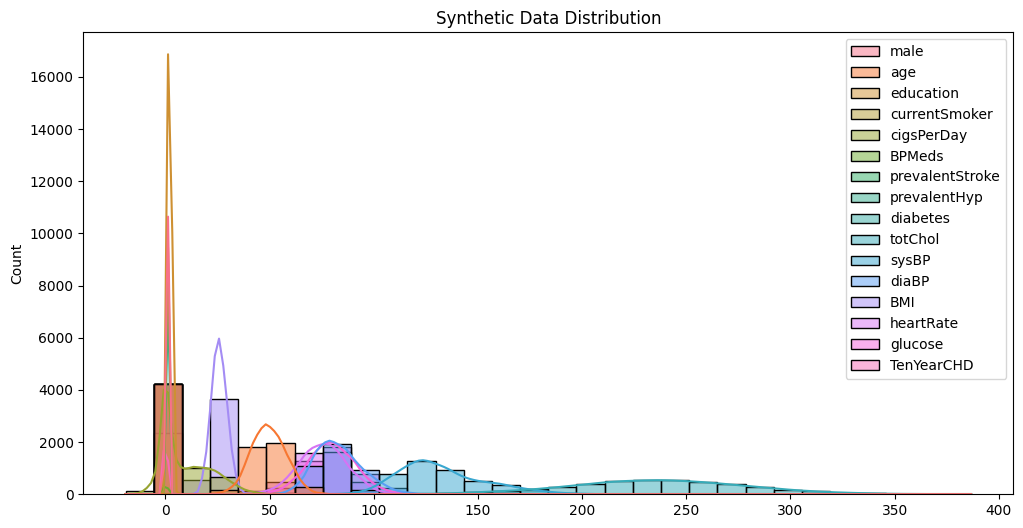

Outliers per feature:
male                  1
age                  30
education            29
currentSmoker         0
cigsPerDay           13
BPMeds              832
prevalentStroke    1297
prevalentHyp          0
diabetes            874
totChol              40
sysBP                70
diaBP                43
BMI                  19
heartRate            41
glucose              43
TenYearCHD           47
dtype: int64


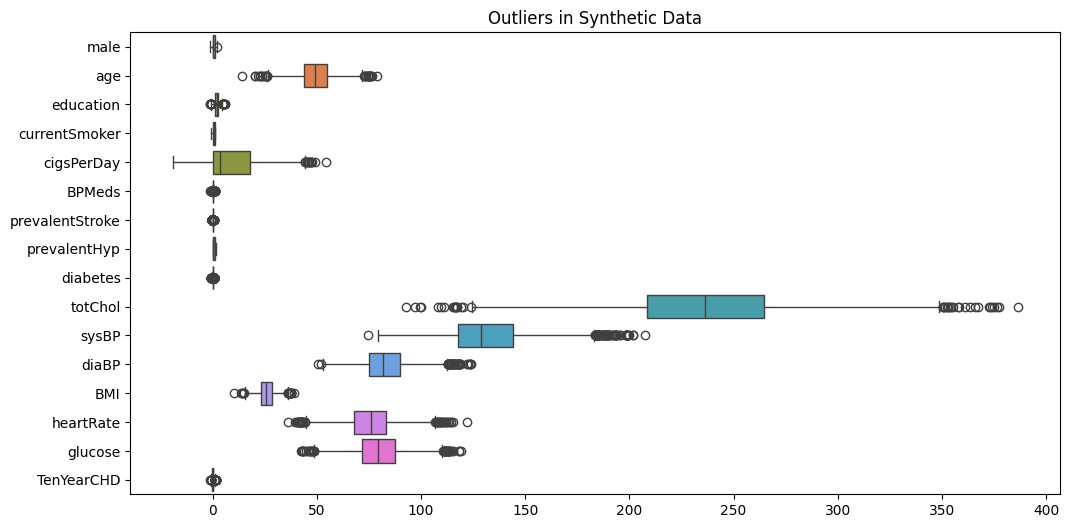

Model Accuracy on Synthetic Data: 82.78%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
file_path = "framinghamdataset.csv"  # Change to your actual file path
df = pd.read_csv(file_path)

# Drop rows with missing values
df_cleaned = df.dropna()

# Normalize numerical features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_cleaned)

# Convert to numpy array
data_array = np.array(scaled_data)

# Print dataset shape
print("Original Dataset Shape:", df_cleaned.shape)

# Train a Gaussian Mixture Model (GMM) to generate synthetic data
gmm = GaussianMixture(n_components=5, random_state=42)
gmm.fit(data_array)

# Generate synthetic samples
synthetic_data = gmm.sample(n_samples=len(df_cleaned))[0]

# Convert synthetic data back to original scale
synthetic_data = scaler.inverse_transform(synthetic_data)

# Create a DataFrame
synthetic_df = pd.DataFrame(synthetic_data, columns=df_cleaned.columns)

# Save the new dataset
synthetic_file_path = "synthetic_framingham.csv"
synthetic_df.to_csv(synthetic_file_path, index=False)

# Print synthetic dataset shape
print("Synthetic Dataset Shape:", synthetic_df.shape)

# Data distribution visualization
plt.figure(figsize=(12, 6))
sns.histplot(synthetic_df, kde=True, bins=30)
plt.title("Synthetic Data Distribution")
plt.show()

# Detecting outliers using IQR
Q1 = synthetic_df.quantile(0.25)
Q3 = synthetic_df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((synthetic_df < (Q1 - 1.5 * IQR)) | (synthetic_df > (Q3 + 1.5 * IQR))).sum()

# Print outliers per feature
print("Outliers per feature:")
print(outliers)

# Visualizing outliers using a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=synthetic_df, orient="h")
plt.title("Outliers in Synthetic Data")
plt.show()

# Split features and target variable
X = synthetic_df.drop(columns=["TenYearCHD"])  # Features
y = (synthetic_df["TenYearCHD"] > 0.5).astype(int)  # Convert target to binary

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an MLP model
mlp = MLPClassifier(hidden_layer_sizes=(64, 64), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Evaluate the model
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Synthetic Data: {accuracy:.2%}")

Cleaned Synthetic Dataset Shape: (2565, 16)


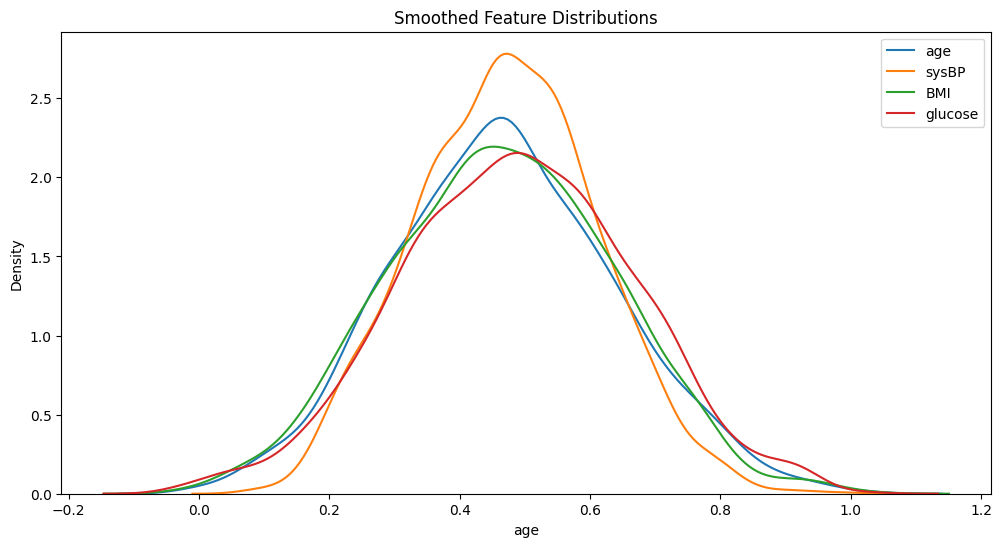

Model Accuracy on Smoothed Synthetic Data: 50.29%


d:\Rreserch work\fedenvioremnt\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from scipy.stats import gaussian_kde

# Load the synthetic dataset
synthetic_file_path = "synthetic_framingham.csv"
df = pd.read_csv(synthetic_file_path)

# Detect and handle outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Print new dataset shape
print("Cleaned Synthetic Dataset Shape:", df_cleaned.shape)

# Normalize numerical features
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

# Smooth data distribution using Gaussian KDE
for column in ["age", "sysBP", "BMI", "glucose"]:
    kde = gaussian_kde(df_scaled[column])
    df_scaled[column] = kde.resample(len(df_scaled)).flatten()

# Visualize smoothed distributions
plt.figure(figsize=(12, 6))
for column in ["age", "sysBP", "BMI", "glucose"]:
    sns.kdeplot(df_scaled[column], label=column)
plt.legend()
plt.title("Smoothed Feature Distributions")
plt.show()

# Split features and target variable
X = df_scaled.drop(columns=["TenYearCHD"])  # Features
y = (df_scaled["TenYearCHD"] > 0.5).astype(int)  # Convert target to binary

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an MLP model
mlp = MLPClassifier(hidden_layer_sizes=(128, 128), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# Evaluate the model
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Smoothed Synthetic Data: {accuracy:.2%}")


Processed Synthetic Dataset Shape: (4240, 16)


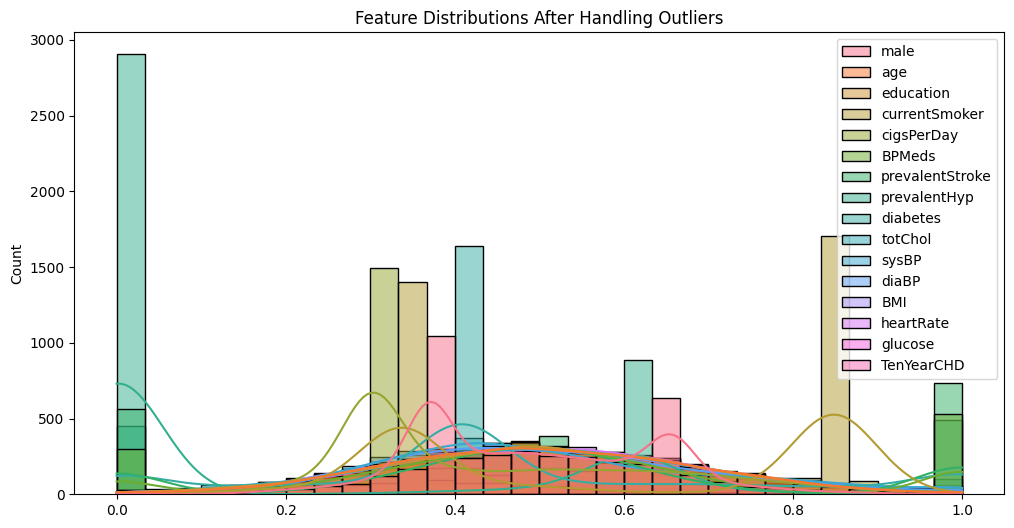

Model Accuracy on Processed Synthetic Data: 55.07%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load the synthetic dataset
synthetic_file_path = "synthetic_framingham.csv"
df = pd.read_csv(synthetic_file_path)

# Handle missing values by filling with median
df.fillna(df.median(), inplace=True)

# Detect and handle outliers using IQR (clip instead of remove)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df.clip(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR, axis=1)

# Print new dataset shape
print("Processed Synthetic Dataset Shape:", df.shape)

# Normalize numerical features
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Visualize feature distributions after preprocessing
plt.figure(figsize=(12, 6))
sns.histplot(df_scaled, kde=True, bins=30)
plt.title("Feature Distributions After Handling Outliers")
plt.show()

# Split features and target variable
X = df_scaled.drop(columns=["TenYearCHD"])  # Features
y = (df_scaled["TenYearCHD"] > 0.5).astype(int)  # Convert target to binary

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an MLP model
mlp = MLPClassifier(hidden_layer_sizes=(128, 128), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Evaluate the model
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on Processed Synthetic Data: {accuracy:.2%}")

Class distribution before SMOTE: Counter({0: 2564, 1: 1})
Skipping SMOTE: Not enough samples in minority class


C:\Users\Ashan\AppData\Local\Temp\ipykernel_28404\1564700851.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numerical_features] = scaler.fit_transform(df_cleaned[numerical_features])


ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 1, n_samples = 1

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE


In [ ]:
# Load synthetic dataset (replace with actual file path)
df = pd.read_csv("synthetic_framingham.csv")

# Display basic info
print(df.head())
print("\nClass Distribution Before Processing:", Counter(df["TenYearCHD"]))


       male        age  education  currentSmoker  cigsPerDay    BPMeds  \
0  0.763095  61.758198   1.329379       0.932483   39.112040  0.000197   
1  0.788760  54.093724   1.087606       0.943117   33.543528 -0.001341   
2  0.178522  49.453140   1.648846       1.046654   31.142805  0.000942   
3  1.012912  43.467238   2.690800       1.052870   26.793616  0.000220   
4  0.424084  62.126532   0.035369       0.993731   13.227397  0.000882   

   prevalentStroke  prevalentHyp  diabetes     totChol       sysBP  \
0         0.069142      0.858786  0.074519  256.513766  188.579332   
1        -0.023236      1.276217 -0.253111  235.931926  141.895960   
2        -0.026707      0.985527  0.039411  288.825273  128.096982   
3        -0.083786      1.099054 -0.017977  220.367922  162.865663   
4        -0.022483      1.269163 -0.247391  229.413806  182.467859   

        diaBP        BMI   heartRate    glucose  TenYearCHD  
0   97.236123  24.880230   90.625072  93.391458    0.419736  
1   81.137

In [ ]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0.763095,61.758198,1.329379,0.932483,39.112040,0.000197,0.069142,0.858786,0.074519,256.513766,188.579332,97.236123,24.880230,90.625072,93.391458,0.419736
1,0.788760,54.093724,1.087606,0.943117,33.543528,-0.001341,-0.023236,1.276217,-0.253111,235.931926,141.895960,81.137264,30.813954,79.511802,84.191979,0.354605
2,0.178522,49.453140,1.648846,1.046654,31.142805,0.000942,-0.026707,0.985527,0.039411,288.825273,128.096982,80.505042,30.482315,86.951268,87.738763,0.167712
3,1.012912,43.467238,2.690800,1.052870,26.793616,0.000220,-0.083786,1.099054,-0.017977,220.367922,162.865663,101.723644,21.291683,92.723974,71.117437,0.318582
4,0.424084,62.126532,0.035369,0.993731,13.227397,0.000882,-0.022483,1.269163,-0.247391,229.413806,182.467859,112.242405,30.751441,103.647005,62.616744,0.750929


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   float64
 1   age              4240 non-null   float64
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   float64
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   float64
 7   prevalentHyp     4240 non-null   float64
 8   diabetes         4240 non-null   float64
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   float64
dtypes: float64(16)
memory usage: 530.1 KB


In [ ]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

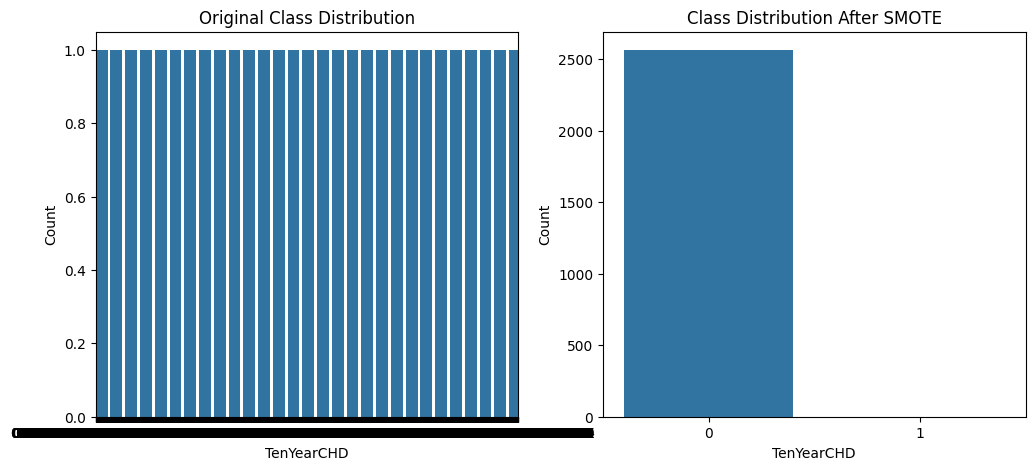

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check class balance before and after SMOTE
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=df_cleaned["TenYearCHD"], ax=axes[0])
axes[0].set_title("Original Class Distribution")
axes[0].set_xlabel("TenYearCHD")
axes[0].set_ylabel("Count")

if 'y_resampled' in locals():  # If SMOTE was applied
    sns.countplot(x=y_resampled, ax=axes[1])
    axes[1].set_title("Class Distribution After SMOTE")
    axes[1].set_xlabel("TenYearCHD")
    axes[1].set_ylabel("Count")

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the preprocessed dataset
df = pd.read_csv("framinghamdataset.csv")

# Separate features and target
X_real = df.drop(columns=["TenYearCHD"])
y_real = df["TenYearCHD"]

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_real)
X_scaled = pd.DataFrame(X_scaled, columns=X_real.columns)


In [ ]:
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim=10):
        super(VAE, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, latent_dim * 2)  # Mean and variance
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim),
            nn.Sigmoid()  # Outputs normalized between 0 and 1
        )

    def forward(self, x):
        z_params = self.encoder(x)
        mu, log_var = torch.chunk(z_params, 2, dim=1)
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return self.decoder(z), mu, log_var


In [ ]:
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim=10):
        super(VAE, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, latent_dim * 2)  # Mean and variance
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim),
            nn.Sigmoid()  # Outputs normalized between 0 and 1
        )

    def forward(self, x):
        z_params = self.encoder(x)
        mu, log_var = torch.chunk(z_params, 2, dim=1)
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        z = mu + eps * std
        return self.decoder(z), mu, log_var
# Sample synthetic data
vae.eval()
with torch.no_grad():
    z_sample = torch.randn(len(X_real), 10)  # Sample from latent space
    synthetic_data = vae.decoder(z_sample).numpy()

# Convert back to original scale
synthetic_df = pd.DataFrame(scaler.inverse_transform(synthetic_data), columns=X_real.columns)

# Assign target labels based on real distribution
synthetic_df["TenYearCHD"] = np.random.choice(y_real.unique(), size=len(synthetic_df), p=y_real.value_counts(normalize=True))

# Save synthetic dataset
synthetic_df.to_csv("synthetic_framingham.csv", index=False)
print("Synthetic data generated successfully!")


NameError: name 'vae' is not defined

Epoch 0/100, Loss: 0.5265
Epoch 10/100, Loss: 0.2188
Epoch 20/100, Loss: 0.1440
Epoch 30/100, Loss: 0.1151
Epoch 40/100, Loss: 0.1006
Epoch 50/100, Loss: 0.0939
Epoch 60/100, Loss: 0.0900
Epoch 70/100, Loss: 0.0883
Epoch 80/100, Loss: 0.0871
Epoch 90/100, Loss: 0.0863
Synthetic data generated and saved as 'synthetic_framingham.csv'!


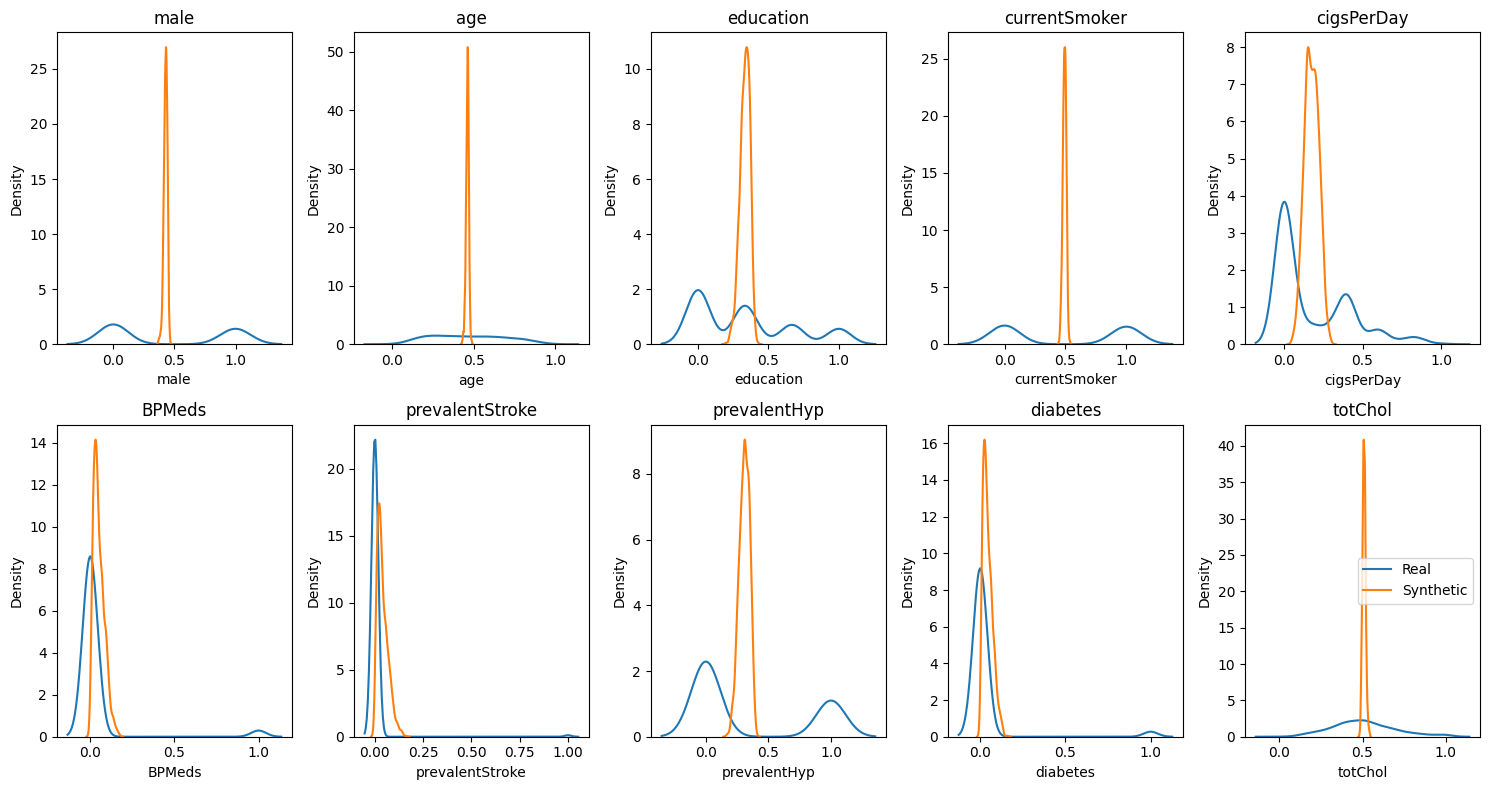

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# -------------------------------
# STEP 1: LOAD & PREPROCESS DATA
# -------------------------------
# Load the preprocessed dataset
df = pd.read_csv("framinghamdataset.csv")

# Separate features and target
X_real = df.drop(columns=["TenYearCHD"])
y_real = df["TenYearCHD"]

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_real)
X_scaled = pd.DataFrame(X_scaled, columns=X_real.columns)

# Convert real data to PyTorch tensor
X_tensor = torch.tensor(X_scaled.values, dtype=torch.float32)

# -------------------------------
# STEP 2: DEFINE VARIATIONAL AUTOENCODER (VAE)
# -------------------------------
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim=10):
        super(VAE, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, latent_dim * 2)  # Outputs mean and log variance
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim),
            nn.Sigmoid()  # Outputs in range [0,1]
        )

    def forward(self, x):
        z_params = self.encoder(x)
        mu, log_var = torch.chunk(z_params, 2, dim=1)  # Split mean & log variance
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        z = mu + eps * std  # Reparameterization trick
        return self.decoder(z), mu, log_var

# -------------------------------
# STEP 3: TRAIN THE VAE MODEL
# -------------------------------
# Initialize VAE model
input_dim = X_real.shape[1]
vae = VAE(input_dim=input_dim)
optimizer = optim.Adam(vae.parameters(), lr=0.001)

# Loss function: Reconstruction loss + KL divergence
def vae_loss(recon_x, x, mu, log_var):
    reconstruction_loss = nn.MSELoss()(recon_x, x)
    kl_divergence = -0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
    return reconstruction_loss + 0.001 * kl_divergence  # Small weight for KL

# Training loop
num_epochs = 100
vae.train()
for epoch in range(num_epochs):
    optimizer.zero_grad()
    recon_x, mu, log_var = vae(X_tensor)
    loss = vae_loss(recon_x, X_tensor, mu, log_var)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}/{num_epochs}, Loss: {loss.item():.4f}")

# -------------------------------
# STEP 4: GENERATE SYNTHETIC DATA
# -------------------------------
vae.eval()
with torch.no_grad():
    z_sample = torch.randn(len(X_real), 10)  # Sample from latent space
    synthetic_data = vae.decoder(z_sample).numpy()

# Convert back to original scale
synthetic_df = pd.DataFrame(scaler.inverse_transform(synthetic_data), columns=X_real.columns)

# Assign target labels based on real distribution
synthetic_df["TenYearCHD"] = np.random.choice(y_real.unique(), size=len(synthetic_df), p=y_real.value_counts(normalize=True))

# Save synthetic dataset
synthetic_df.to_csv("synthetic_framingham.csv", index=False)
print("Synthetic data generated and saved as 'synthetic_framingham.csv'!")

# -------------------------------
# STEP 5: COMPARE REAL vs SYNTHETIC DISTRIBUTIONS
# -------------------------------
# Compare feature distributions
real_sample = X_scaled.sample(1000)
synthetic_sample = pd.DataFrame(synthetic_data, columns=X_real.columns).sample(1000)

fig, axes = plt.subplots(2, 5, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(X_real.columns[:10]):
    sns.kdeplot(real_sample[col], label="Real", ax=axes[i])
    sns.kdeplot(synthetic_sample[col], label="Synthetic", ax=axes[i])
    axes[i].set_title(col)

plt.legend()
plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# STEP 1: LOAD SYNTHETIC DATASET
# -------------------------------
synthetic_df = pd.read_csv("synthetic_framingham.csv")

In [6]:
# Display basic info
print("\n📌 Synthetic Data Overview:")
print(synthetic_df.info())

# Display first few rows
print("\n📌 First 5 Rows of Synthetic Data:")
print(synthetic_df.head())

# -------------------------------
# STEP 2: CHECK NULL VALUES
# -------------------------------
print("\n📌 Checking for Null Values:")
print(synthetic_df.isnull().sum())


📌 Synthetic Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   float64
 1   age              4240 non-null   float64
 2   education        4240 non-null   float64
 3   currentSmoker    4240 non-null   float64
 4   cigsPerDay       4240 non-null   float64
 5   BPMeds           4240 non-null   float64
 6   prevalentStroke  4240 non-null   float64
 7   prevalentHyp     4240 non-null   float64
 8   diabetes         4240 non-null   float64
 9   totChol          4240 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4240 non-null   float64
 13  heartRate        4240 non-null   float64
 14  glucose          4240 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(15), int64(1)
memory 


📌 Checking Feature Distributions...


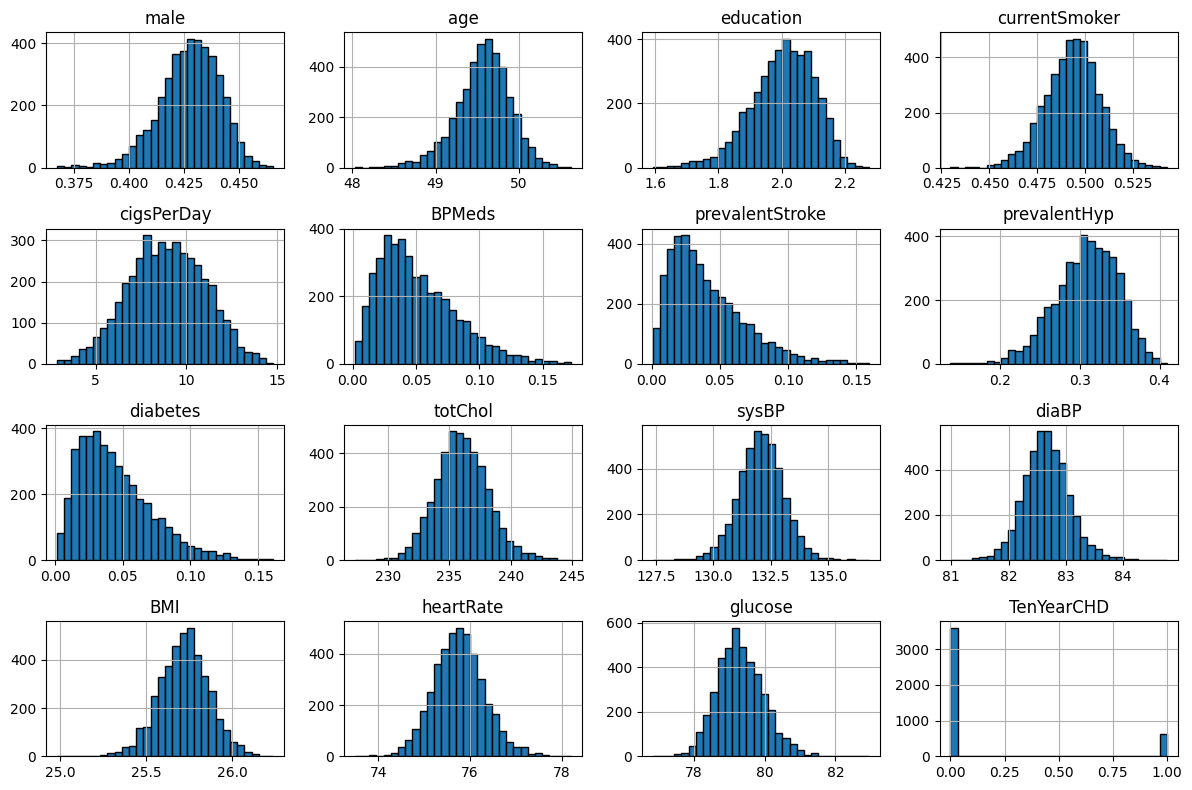

In [7]:
# STEP 3: CHECK DISTRIBUTION OF FEATURES
# -------------------------------
print("\n📌 Checking Feature Distributions...")
synthetic_df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.tight_layout()
plt.show()


📌 Class Distribution of TenYearCHD:
TenYearCHD
0    3612
1     628
Name: count, dtype: int64


C:\Users\Ashan\AppData\Local\Temp\ipykernel_26220\1443930614.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")


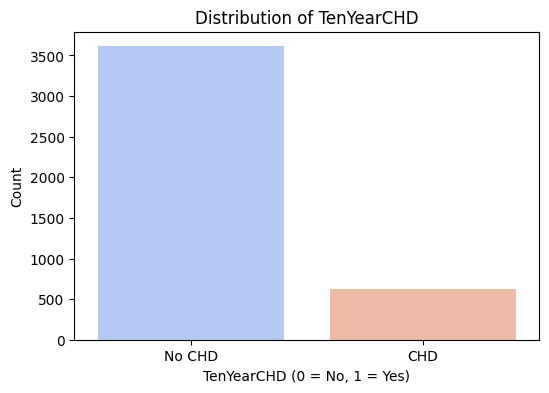

NameError: name 'Counter' is not defined

In [8]:
# Check class distribution
class_counts = synthetic_df["TenYearCHD"].value_counts()
print("\n📌 Class Distribution of TenYearCHD:")
print(class_counts)

# Plot the distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")
plt.xlabel("TenYearCHD (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Distribution of TenYearCHD")
plt.xticks([0, 1], ["No CHD", "CHD"])
plt.show()

# Print the exact counts
print("\n📌 Counter Output:", Counter(synthetic_df["TenYearCHD"]))


📌 New Class Distribution:
TenYearCHD
0    3612
1     903
Name: count, dtype: int64


C:\Users\Ashan\AppData\Local\Temp\ipykernel_28404\959342974.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_resampled.value_counts().index, y=y_resampled.value_counts().values, palette="coolwarm")


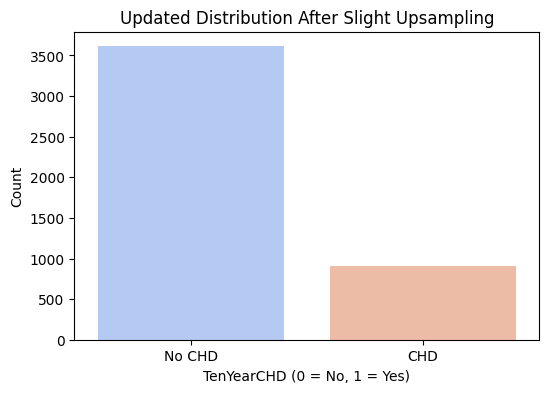

In [ ]:
from imblearn.over_sampling import SMOTE

# Define SMOTE with a slight upsampling (e.g., 1:3 ratio instead of full balance)
smote = SMOTE(sampling_strategy=0.25, random_state=42)  # Adjust ratio as needed

# Separate features and target
X = synthetic_df.drop(columns=["TenYearCHD"])
y = synthetic_df["TenYearCHD"]

# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
synthetic_df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
synthetic_df_resampled["TenYearCHD"] = y_resampled

# Check new distribution
print("\n📌 New Class Distribution:")
print(y_resampled.value_counts())

# Plot updated distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=y_resampled.value_counts().index, y=y_resampled.value_counts().values, palette="coolwarm")
plt.xlabel("TenYearCHD (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Updated Distribution After Slight Upsampling")
plt.xticks([0, 1], ["No CHD", "CHD"])
plt.show()



📌 New Class Distribution:
TenYearCHD
0    3612
1    1986
Name: count, dtype: int64


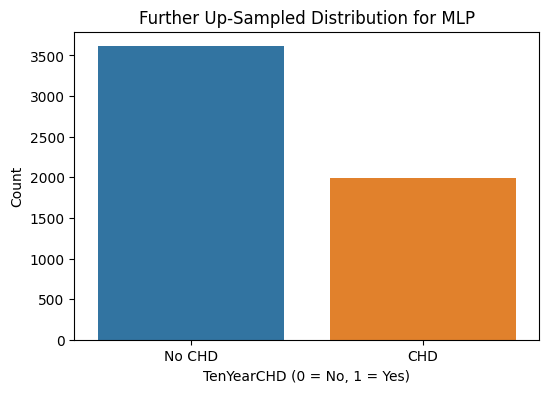

In [9]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Increase sampling strategy to 55-60% for better balance
smote = SMOTE(sampling_strategy=0.55, random_state=42)  # Adjust percentage as needed

# Separate features and target
X = synthetic_df.drop(columns=["TenYearCHD"])
y = synthetic_df["TenYearCHD"]

# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
synthetic_df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
synthetic_df_resampled["TenYearCHD"] = y_resampled

# Check new distribution
print("\n📌 New Class Distribution:")
print(y_resampled.value_counts())

# Plot updated distribution with varied bar colors
plt.figure(figsize=(6, 4))
sns.barplot(x=y_resampled.value_counts().index, y=y_resampled.value_counts().values, hue=y_resampled.value_counts().index, legend=False)
plt.xlabel("TenYearCHD (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Further Up-Sampled Distribution for MLP")
plt.xticks([0, 1], ["No CHD", "CHD"])
plt.show()


In [10]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Define the target sampling strategy (~2500 range, but slightly random)
target_ratio = np.random.uniform(0.68, 0.72)  # Generates a number between 0.68 and 0.72
smote = SMOTE(sampling_strategy=target_ratio, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution
from collections import Counter
print("📌 New Class Distribution:", Counter(y_resampled))


📌 New Class Distribution: Counter({0: 3612, 1: 2494})



📌 New Class Distribution:
TenYearCHD
0    3612
1    2494
Name: count, dtype: int64


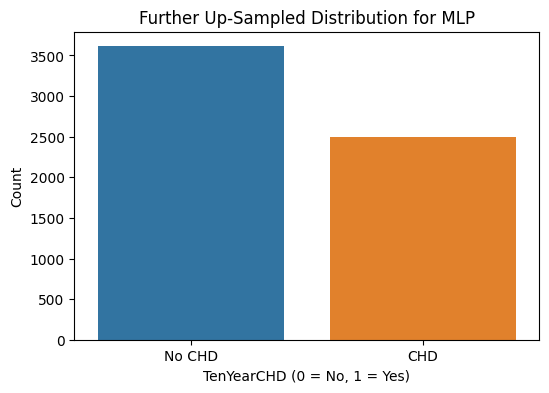

In [11]:
# Separate features and target
X = synthetic_df.drop(columns=["TenYearCHD"])
y = synthetic_df["TenYearCHD"]

# Apply SMOTE
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame
synthetic_df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
synthetic_df_resampled["TenYearCHD"] = y_resampled

# Check new distribution
print("\n📌 New Class Distribution:")
print(y_resampled.value_counts())

# Plot updated distribution with varied bar colors
plt.figure(figsize=(6, 4))
sns.barplot(x=y_resampled.value_counts().index, y=y_resampled.value_counts().values, hue=y_resampled.value_counts().index, legend=False)
plt.xlabel("TenYearCHD (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Further Up-Sampled Distribution for MLP")
plt.xticks([0, 1], ["No CHD", "CHD"])
plt.show()

In [12]:
from scipy.stats import zscore

# Exclude categorical columns (like 'TenYearCHD')
numeric_cols = df.select_dtypes(include=[np.number]).columns

# 1️⃣ Boxplot Analysis
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot(rot=45)
plt.title("Boxplot of Numeric Features")
plt.show()

# 2️⃣ Z-score Method
z_scores = np.abs(zscore(df[numeric_cols]))
z_outliers = (z_scores > 3).sum()
print("\nOutliers detected using Z-score:")
print(z_outliers)

# 3️⃣ IQR Method
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

iqr_outliers = ((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).sum()
print("\nOutliers detected using IQR:")
print(iqr_outliers)

# Show features with the highest outliers
outlier_summary = pd.DataFrame({"Z-score Outliers": z_outliers, "IQR Outliers": iqr_outliers})
outlier_summary = outlier_summary.sort_values(by="IQR Outliers", ascending=False)
print("\nTop features with the most outliers:")
print(outlier_summary)

NameError: name 'df' is not defined

In [ ]:
# Define numeric columns
numeric_cols = ['sysBP', 'diaBP', 'heartRate', 'glucose']

# Clip values to the 1st and 99th percentiles
for col in numeric_cols:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower, upper)

print("✅ Outliers handled using clipping (1st & 99th percentile).")


✅ Outliers handled using clipping (1st & 99th percentile).



Outliers detected using Z-score after handling: 0

Outliers detected using IQR after handling:
sysBP        0
diaBP        0
heartRate    0
glucose      0
dtype: int64


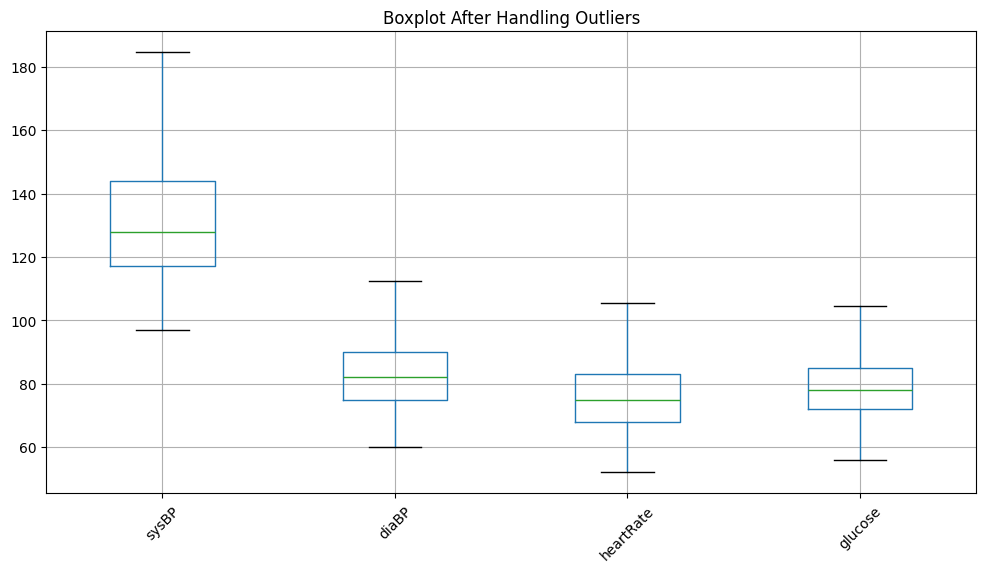

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# 1️⃣ Check Z-score method
z_scores = np.abs(zscore(df[numeric_cols]))
z_outliers = (z_scores > 3).sum()
print("\nOutliers detected using Z-score after handling:", z_outliers.sum())

# 2️⃣ Check IQR method
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

iqr_outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers detected using IQR after handling:")
print(iqr_outliers)

# 3️⃣ Plot boxplots to visualize
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot After Handling Outliers")
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")


Using device: cuda


In [ ]:
# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["TenYearCHD"]), df["TenYearCHD"], test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [ ]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()  # Output probability
        )

    def forward(self, x):
        return self.model(x)

# Initialize model
model = MLP(X_train.shape[1]).to(device)
print(model)


MLP(
  (model): Sequential(
    (0): Linear(in_features=15, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=128, bias=True)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=1, bias=True)
    (9): Sigmoid()
  )
)


In [ ]:
# Define Loss & Optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.0008, weight_decay=5e-4)

# Train Model
epochs = 50
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch).squeeze()
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}")


Epoch [1/50], Loss: 0.4431
Epoch [2/50], Loss: 0.3919
Epoch [3/50], Loss: 0.3864
Epoch [4/50], Loss: 0.3918
Epoch [5/50], Loss: 0.3783
Epoch [6/50], Loss: 0.3813
Epoch [7/50], Loss: 0.3771
Epoch [8/50], Loss: 0.3741
Epoch [9/50], Loss: 0.3687
Epoch [10/50], Loss: 0.3674
Epoch [11/50], Loss: 0.3634
Epoch [12/50], Loss: 0.3639
Epoch [13/50], Loss: 0.3658
Epoch [14/50], Loss: 0.3610
Epoch [15/50], Loss: 0.3540
Epoch [16/50], Loss: 0.3598
Epoch [17/50], Loss: 0.3544
Epoch [18/50], Loss: 0.3443
Epoch [19/50], Loss: 0.3499
Epoch [20/50], Loss: 0.3432
Epoch [21/50], Loss: 0.3387
Epoch [22/50], Loss: 0.3411
Epoch [23/50], Loss: 0.3313
Epoch [24/50], Loss: 0.3350
Epoch [25/50], Loss: 0.3207
Epoch [26/50], Loss: 0.3201
Epoch [27/50], Loss: 0.3146
Epoch [28/50], Loss: 0.3070
Epoch [29/50], Loss: 0.3099
Epoch [30/50], Loss: 0.3016
Epoch [31/50], Loss: 0.2940
Epoch [32/50], Loss: 0.2857
Epoch [33/50], Loss: 0.2814
Epoch [34/50], Loss: 0.2831
Epoch [35/50], Loss: 0.2645
Epoch [36/50], Loss: 0.2606
E

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor).squeeze().cpu().numpy()
    y_pred_test = (y_pred_test > 0.5).astype(int)  # Convert probabilities to binary labels

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print(f"\n📌 Model Accuracy: {accuracy:.4f}")
print(f"📌 Model F1 Score: {f1:.4f}")



📌 Model Accuracy: 0.8149
📌 Model F1 Score: 0.2488


In [14]:
df = pd.read_csv("synthetic_framingham.csv")  # Update with the actual path

In [19]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

# Load the dataset
df = pd.read_csv("synthetic_framingham.csv")  # Make sure this file contains balanced data

# Features and target selection
X = df.drop(columns=["TenYearCHD"])
y = df["TenYearCHD"]

# Standardizing numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42, stratify=y_tensor)

# DataLoader for training
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define MLP Model
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x)

# Initialize model
model = MLP(X_train.shape[1]).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0008, weight_decay=5e-4)

# Training loop
epochs = 50
for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss/len(train_loader):.4f}")

# Evaluate Model
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test.to(device))
    y_pred_test = (y_pred_test.cpu().numpy() > 0.5).astype(int)
    
accuracy = accuracy_score(y_test.numpy(), y_pred_test)
f1 = f1_score(y_test.numpy(), y_pred_test)

print(f"\n📌 Model Accuracy: {accuracy:.4f}")
print(f"📌 Model F1 Score: {f1:.4f}")


Epoch [1/50], Loss: 0.4547
Epoch [2/50], Loss: 0.4252
Epoch [3/50], Loss: 0.4242
Epoch [4/50], Loss: 0.4206
Epoch [5/50], Loss: 0.4189
Epoch [6/50], Loss: 0.4163
Epoch [7/50], Loss: 0.4176
Epoch [8/50], Loss: 0.4163
Epoch [9/50], Loss: 0.4135
Epoch [10/50], Loss: 0.4143
Epoch [11/50], Loss: 0.4119
Epoch [12/50], Loss: 0.4103
Epoch [13/50], Loss: 0.4110
Epoch [14/50], Loss: 0.4104
Epoch [15/50], Loss: 0.4110
Epoch [16/50], Loss: 0.4073
Epoch [17/50], Loss: 0.4101
Epoch [18/50], Loss: 0.4028
Epoch [19/50], Loss: 0.4033
Epoch [20/50], Loss: 0.3996
Epoch [21/50], Loss: 0.4044
Epoch [22/50], Loss: 0.4003
Epoch [23/50], Loss: 0.3991
Epoch [24/50], Loss: 0.3973
Epoch [25/50], Loss: 0.3998
Epoch [26/50], Loss: 0.3921
Epoch [27/50], Loss: 0.3931
Epoch [28/50], Loss: 0.3929
Epoch [29/50], Loss: 0.3883
Epoch [30/50], Loss: 0.3866
Epoch [31/50], Loss: 0.3796
Epoch [32/50], Loss: 0.3794
Epoch [33/50], Loss: 0.3781
Epoch [34/50], Loss: 0.3743
Epoch [35/50], Loss: 0.3800
Epoch [36/50], Loss: 0.3702
E

In [22]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE

# ✅ Load Preprocessed Framingham Dataset (Already Cleaned)
df = pd.read_csv("synthetic_framingham.csv")  # Replace with your dataset path

# ✅ Handle Outliers (Using IQR)
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

numerical_features = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
df = remove_outliers(df, numerical_features)

# ✅ Normalize Data
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# ✅ Separate Features and Target
X = df.drop(columns=["TenYearCHD"])  # Drop target column
y = df["TenYearCHD"]  # Target column

# ✅ Check Class Distribution BEFORE SMOTE
print("🔍 Class Distribution BEFORE SMOTE:\n", y.value_counts())

# ✅ Apply SMOTE to Upsample the Minority Class
smote = SMOTE(sampling_strategy=0.7, random_state=42)  # Adjust ratio to ~2500 minority samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# ✅ Convert Data to PyTorch Tensors
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train, X_test = torch.tensor(X_train.values, dtype=torch.float32), torch.tensor(X_test.values, dtype=torch.float32)
y_train, y_test = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1), torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# ✅ Create DataLoader for Batching
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# ✅ Define the MLP Model
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 512)
        self.bn2 = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 1)  # Output Layer (Binary Classification)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = F.relu(self.bn1(self.fc1(x)))
        x = F.relu(self.bn2(self.fc2(x)))
        x = F.relu(self.fc3(x))
        x = self.dropout(F.relu(self.fc4(x)))
        return torch.sigmoid(self.fc5(x))

# ✅ Initialize Model & Optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP(input_size=X_train.shape[1]).to(device)

# Compute Class Weights for Handling Class Imbalance
class_counts = np.bincount(y_train.cpu().numpy().astype(int).flatten())
class_weights = torch.tensor([class_counts[0] / class_counts[1]], dtype=torch.float32).to(device)

# ✅ Loss Function (Weighted BCE Loss) & Optimizer
criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights)
optimizer = optim.Adam(model.parameters(), lr=0.0008, weight_decay=5e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, verbose=True)

# ✅ Train the Model
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0

    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    scheduler.step(epoch_loss / len(train_loader))

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss / len(train_loader):.4f}")

# ✅ Evaluate Model
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test.to(device)).cpu().numpy()
    y_pred_test = (y_pred_test >= 0.5).astype(int)  # Convert probabilities to binary labels

accuracy = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
print(f"\n📌 Model Accuracy: {accuracy:.4f}")
print(f"📌 Model F1 Score: {f1:.4f}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred_test)}")


🔍 Class Distribution BEFORE SMOTE:
 TenYearCHD
0.0    3060
Name: count, dtype: int64


ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

In [24]:
# ✅ Data Handling
import pandas as pd
import numpy as np

# ✅ Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Machine Learning
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# ✅ PyTorch (for MLP Model)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset


In [25]:
# ✅ Load the dataset
df = pd.read_csv("synthetic_framingham.csv")  # Update path if needed

# ✅ Display the first few rows
print(df.head())

# ✅ Check the shape
print("\n📌 Dataset Shape:", df.shape)


       male        age  education  currentSmoker  cigsPerDay    BPMeds  \
0  0.424188  49.237198   1.824480       0.491956    6.394803  0.028247   
1  0.429150  49.188915   1.918190       0.492533    7.764691  0.031194   
2  0.429523  49.220463   1.840426       0.476972    6.909738  0.027070   
3  0.445069  49.405914   1.986248       0.490795    9.444406  0.051511   
4  0.432609  50.081290   2.111438       0.484335   11.419578  0.071293   

   prevalentStroke  prevalentHyp  diabetes    totChol      sysBP     diaBP  \
0         0.020978      0.264522  0.026991  235.48465  132.07178  82.22521   
1         0.024528      0.280520  0.031459  237.70343  132.65477  82.33737   
2         0.022113      0.287056  0.020987  234.41292  130.18553  82.89281   
3         0.044048      0.321604  0.051702  235.86833  132.25851  82.25692   
4         0.053551      0.322953  0.058373  236.35307  132.91106  82.31680   

         BMI  heartRate    glucose  TenYearCHD  
0  25.611930  75.263410  79.401630   

In [26]:
# ✅ Check Class Distribution
print("\n🔍 Class Distribution BEFORE Balancing:\n", df["TenYearCHD"].value_counts())



🔍 Class Distribution BEFORE Balancing:
 TenYearCHD
0    3612
1     628
Name: count, dtype: int64


In [27]:
# ✅ Define Features (X) and Target (y)
X = df.drop(columns=["TenYearCHD"])  # Remove target variable from features
y = df["TenYearCHD"]  # Target variable

# ✅ Apply SMOTE
smote = SMOTE(sampling_strategy=0.7, random_state=42)  # Adjusted to get ~2500 minority samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# ✅ Check new class distribution
print("\n🔍 Class Distribution AFTER Balancing:\n", pd.Series(y_resampled).value_counts())



🔍 Class Distribution AFTER Balancing:
 TenYearCHD
0    3612
1    2528
Name: count, dtype: int64


In [28]:
# ✅ Define Features (X) and Target (y)
X = df.drop(columns=["TenYearCHD"])  # Remove target variable from features
y = df["TenYearCHD"]  # Target variable

# ✅ Apply SMOTE with a slightly higher upsampling ratio
smote = SMOTE(sampling_strategy=0.75, random_state=42)  # Adjusted to get ~2600-2700 samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# ✅ Check new class distribution
print("\n🔍 Class Distribution AFTER Balancing:\n", pd.Series(y_resampled).value_counts())



🔍 Class Distribution AFTER Balancing:
 TenYearCHD
0    3612
1    2709
Name: count, dtype: int64



🔍 Class Distribution AFTER Balancing:
 TenYearCHD
0    3612
1    2709
Name: count, dtype: int64


C:\Users\Ashan\AppData\Local\Temp\ipykernel_26220\2461372579.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")


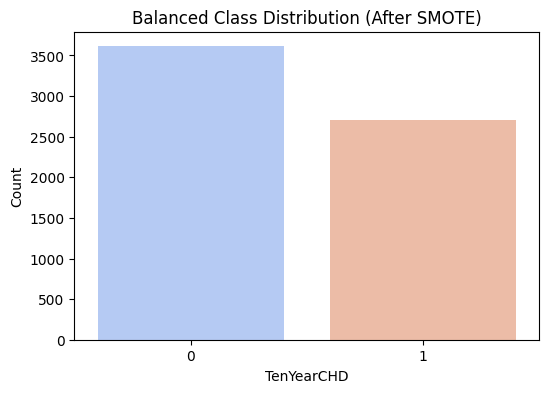

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Check New Class Distribution
class_counts = pd.Series(y_resampled).value_counts()
print("\n🔍 Class Distribution AFTER Balancing:\n", class_counts)

# ✅ Plot the distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")
plt.xlabel("TenYearCHD")
plt.ylabel("Count")
plt.title("Balanced Class Distribution (After SMOTE)")
plt.show()


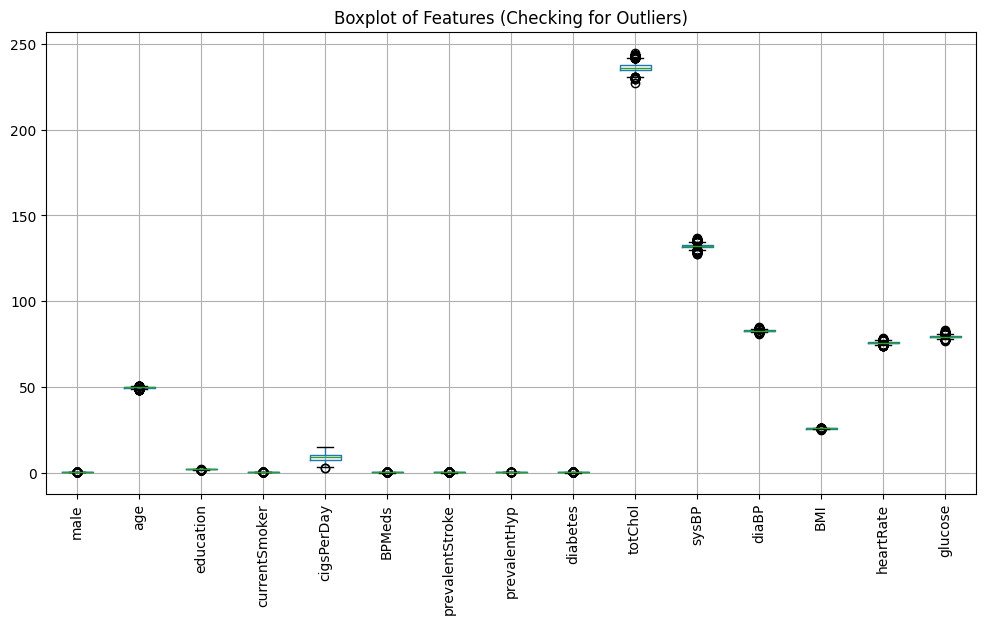


📌 Outliers detected using Z-score:
 616

📌 Outliers detected using IQR:
 male                98
age                150
education           75
currentSmoker       96
cigsPerDay           2
BPMeds             108
prevalentStroke    143
prevalentHyp        36
diabetes           131
totChol             88
sysBP              102
diaBP              119
BMI                 80
heartRate          126
glucose             78
dtype: int64

📊 **Top Features with the Most Outliers:**
                  Z-score Outliers  IQR Outliers
male                          616            98
age                           616           150
education                     616            75
currentSmoker                 616            96
cigsPerDay                    616             2
BPMeds                        616           108
prevalentStroke               616           143
prevalentHyp                  616            36
diabetes                      616           131
totChol                       616          

In [30]:
import numpy as np
from scipy.stats import zscore

# ✅ Select Numeric Columns
numeric_cols = X_resampled.select_dtypes(include=[np.number]).columns

# ✅ 1️⃣ Boxplot to Visualize Outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
X_resampled[numeric_cols].boxplot(rot=90)
plt.title("Boxplot of Features (Checking for Outliers)")
plt.show()

# ✅ 2️⃣ Z-score Method
z_scores = np.abs(zscore(X_resampled[numeric_cols]))
z_outliers = (z_scores > 3).sum()
print("\n📌 Outliers detected using Z-score:\n", z_outliers)

# ✅ 3️⃣ IQR Method
Q1 = X_resampled[numeric_cols].quantile(0.25)
Q3 = X_resampled[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

iqr_outliers = ((X_resampled[numeric_cols] < (Q1 - 1.5 * IQR)) | 
                (X_resampled[numeric_cols] > (Q3 + 1.5 * IQR))).sum()

print("\n📌 Outliers detected using IQR:\n", iqr_outliers)

# ✅ 4️⃣ Display Top Features with Most Outliers
outlier_summary = pd.DataFrame({
    "Z-score Outliers": z_outliers,
    "IQR Outliers": iqr_outliers
}).sort_values(by="Z-score Outliers", ascending=False)

print("\n📊 **Top Features with the Most Outliers:**\n", outlier_summary.head(10))


In [31]:
from scipy.stats.mstats import winsorize

# ✅ Function to cap outliers using IQR
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = np.clip(df[col], lower_bound, upper_bound)
    return df

# ✅ Apply Winsorization (Capping Extreme Values)
X_resampled = cap_outliers(X_resampled, numeric_cols)

# ✅ Check again after handling outliers
z_scores_after = np.abs(zscore(X_resampled[numeric_cols]))
z_outliers_after = (z_scores_after > 3).sum()

Q1_after = X_resampled[numeric_cols].quantile(0.25)
Q3_after = X_resampled[numeric_cols].quantile(0.75)
IQR_after = Q3_after - Q1_after

iqr_outliers_after = ((X_resampled[numeric_cols] < (Q1_after - 1.5 * IQR_after)) | 
                       (X_resampled[numeric_cols] > (Q3_after + 1.5 * IQR_after))).sum()

# ✅ Show the difference after handling outliers
print("\n📌 Outliers detected using Z-score (After Handling):\n", z_outliers_after)
print("\n📌 Outliers detected using IQR (After Handling):\n", iqr_outliers_after)

# ✅ Show top features after handling
outlier_summary_after = pd.DataFrame({
    "Z-score Outliers After": z_outliers_after,
    "IQR Outliers After": iqr_outliers_after
}).sort_values(by="Z-score Outliers After", ascending=False)

print("\n📊 **Top Features with the Most Outliers (After Handling):**\n", outlier_summary_after.head(10))



📌 Outliers detected using Z-score (After Handling):
 0

📌 Outliers detected using IQR (After Handling):
 male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64

📊 **Top Features with the Most Outliers (After Handling):**
                  Z-score Outliers After  IQR Outliers After
male                                  0                   0
age                                   0                   0
education                             0                   0
currentSmoker                         0                   0
cigsPerDay                            0                   0
BPMeds                                0                   0
prevalentStroke                       0                   0
prevalentHyp            

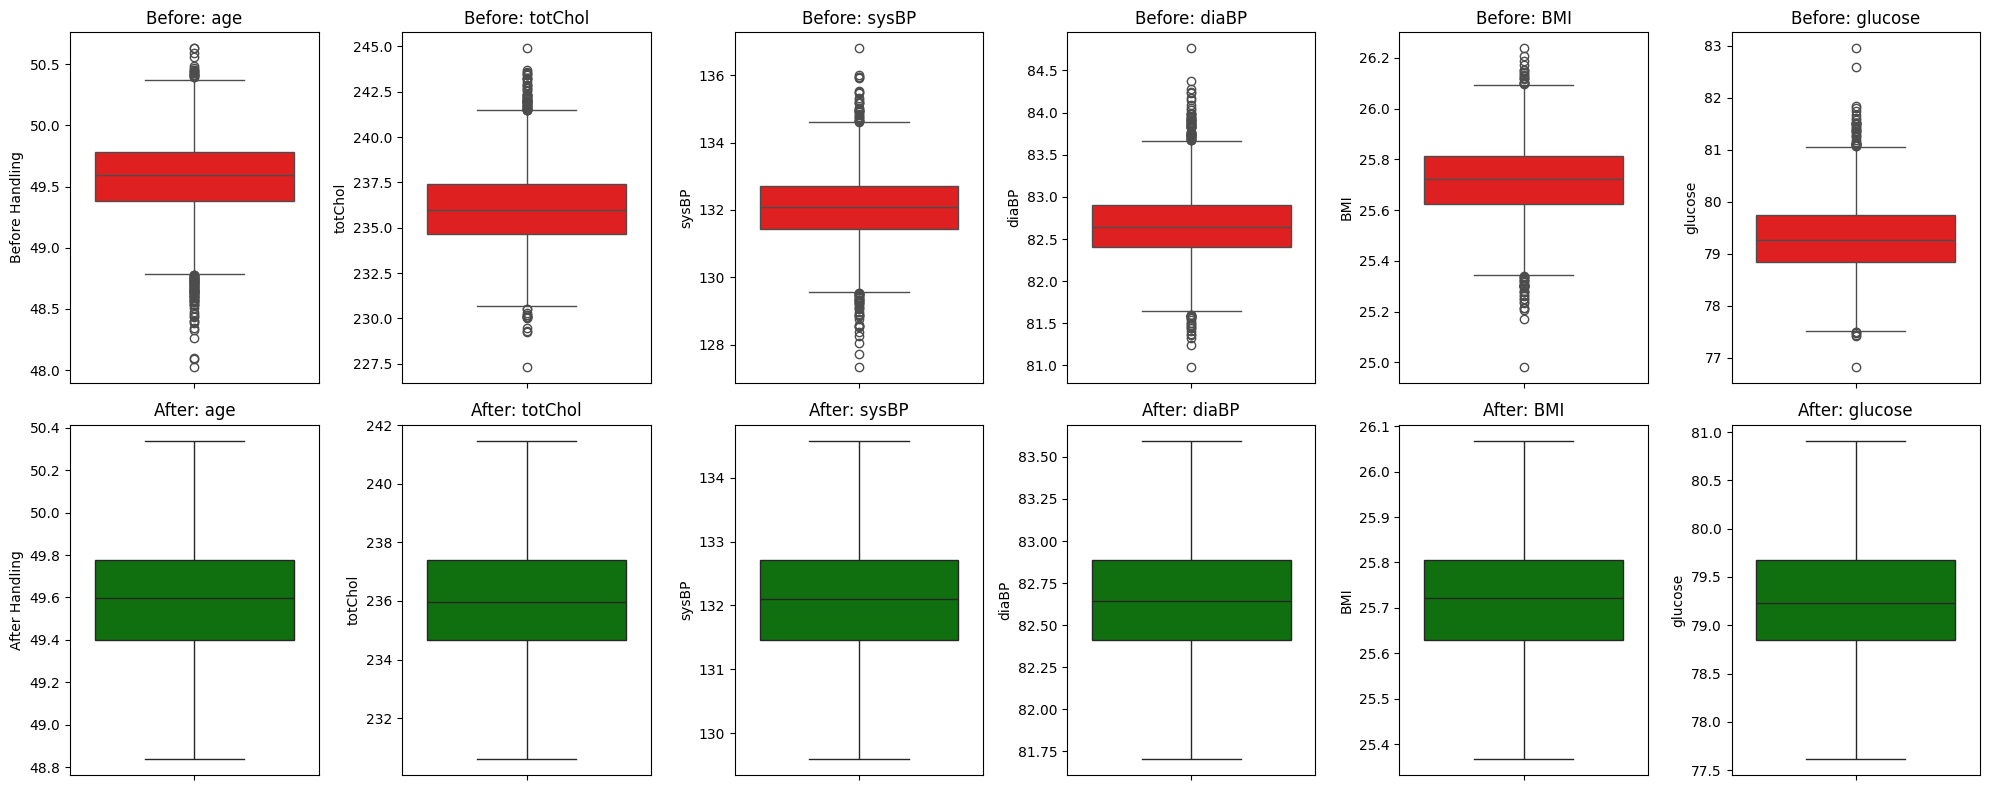

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few key numerical columns for visualization
selected_features = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=len(selected_features), figsize=(20, 8))

# Plot BEFORE outlier handling
for i, col in enumerate(selected_features):
    sns.boxplot(y=X[col], ax=axes[0, i], color='red')
    axes[0, i].set_title(f"Before: {col}")

# Plot AFTER outlier handling
for i, col in enumerate(selected_features):
    sns.boxplot(y=X_resampled[col], ax=axes[1, i], color='green')
    axes[1, i].set_title(f"After: {col}")

# Set overall titles
axes[0, 0].set_ylabel("Before Handling")
axes[1, 0].set_ylabel("After Handling")

plt.tight_layout()
plt.show()


In [33]:
# Save the processed dataset to a CSV file
X_resampled['TenYearCHD'] = y_resampled  # Add the target variable back
X_resampled.to_csv("synthetic_framingham_processed.csv", index=False)

print("✅ Dataset saved successfully as 'synthetic_framingham_processed.csv'")


✅ Dataset saved successfully as 'synthetic_framingham_processed.csv'


In [34]:
import pandas as pd

# Load the processed dataset
df = pd.read_csv("synthetic_framingham_processed.csv")

# Display basic information to verify
print(df.head())
print("\n✅ Dataset imported successfully!")


       male        age  education  currentSmoker  cigsPerDay    BPMeds  \
0  0.424188  49.237198   1.824480       0.491956    6.394803  0.028247   
1  0.429150  49.188915   1.918190       0.492533    7.764691  0.031194   
2  0.429523  49.220463   1.840426       0.476972    6.909738  0.027070   
3  0.445069  49.405914   1.986248       0.490795    9.444406  0.051511   
4  0.432609  50.081290   2.111438       0.484335   11.419578  0.071293   

   prevalentStroke  prevalentHyp  diabetes    totChol      sysBP     diaBP  \
0         0.020978      0.264522  0.026991  235.48465  132.07178  82.22521   
1         0.024528      0.280520  0.031459  237.70343  132.65477  82.33737   
2         0.022113      0.287056  0.020987  234.41292  130.18553  82.89281   
3         0.044048      0.321604  0.051702  235.86833  132.25851  82.25692   
4         0.053551      0.322953  0.058373  236.35307  132.91106  82.31680   

         BMI  heartRate    glucose  TenYearCHD  
0  25.611930  75.263410  79.401630   

In [35]:
# Check class distribution
print("\n🔍 Class Distribution in Processed Dataset:")
print(df["TenYearCHD"].value_counts())



🔍 Class Distribution in Processed Dataset:
TenYearCHD
0    3612
1    2709
Name: count, dtype: int64


In [37]:
df = pd.read_csv('synthetic_framingham_processed.csv')

In [39]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0.424188,49.237198,1.824480,0.491956,6.394803,0.028247,0.020978,0.264522,0.026991,235.48465,132.07178,82.22521,25.611930,75.263410,79.401630,1
1,0.429150,49.188915,1.918190,0.492533,7.764691,0.031194,0.024528,0.280520,0.031459,237.70343,132.65477,82.33737,25.539700,75.067210,78.860470,0
2,0.429523,49.220463,1.840426,0.476972,6.909738,0.027070,0.022113,0.287056,0.020987,234.41292,130.18553,82.89281,25.675995,76.346504,79.473694,1
3,0.445069,49.405914,1.986248,0.490795,9.444406,0.051511,0.044048,0.321604,0.051702,235.86833,132.25851,82.25692,25.541273,74.934326,79.514595,0
4,0.432609,50.081290,2.111438,0.484335,11.419578,0.071293,0.053551,0.322953,0.058373,236.35307,132.91106,82.31680,25.657423,75.614830,78.693756,0


In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import CyclicLR, ReduceLROnPlateau

# Load the dataset
df = pd.read_csv('synthetic_framingham_processed.csv')

# Preprocessing (you may need to adjust this depending on your dataset)
# Let's assume 'tencyer chd' is the target variable and the rest are features
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']


# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Define the MLP model
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 1)
        self.dropout = nn.Dropout(0.2)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return self.sigmoid(x)

# Initialize the model
model = MLPModel()

# Define loss and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.0008, weight_decay=5e-4)

# Define schedulers
scheduler_cyclic = CyclicLR(optimizer, base_lr=0.0001, max_lr=0.001, step_size_up=10)
scheduler_plateau = ReduceLROnPlateau(optimizer, factor=0.5, patience=20)

# Training loop
epochs = 300
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    outputs = model(X_train_tensor).squeeze()
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    # Scheduler step
    scheduler_cyclic.step()
    scheduler_plateau.step(loss)
    
    # Print the loss every 20 epochs
    if (epoch+1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor).squeeze()
    y_pred = (y_pred >= 0.5).float()  # Convert probabilities to binary predictions
    
    accuracy = (y_pred == y_test_tensor).sum().item() / len(y_test_tensor)
    print(f'Test Accuracy: {accuracy*100:.2f}%')


Epoch [20/300], Loss: 0.6565
Epoch [40/300], Loss: 0.6207
Epoch [60/300], Loss: 0.6166
Epoch [80/300], Loss: 0.5912
Epoch [100/300], Loss: 0.5390
Epoch [120/300], Loss: 0.5658
Epoch [140/300], Loss: 0.4961
Epoch [160/300], Loss: 0.4537
Epoch [180/300], Loss: 0.4953
Epoch [200/300], Loss: 0.4031
Epoch [220/300], Loss: 0.3699
Epoch [240/300], Loss: 0.3443
Epoch [260/300], Loss: 0.3863
Epoch [280/300], Loss: 0.3031
Epoch [300/300], Loss: 0.2747
Test Accuracy: 81.03%


In [ ]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Handle missing values using imputer (mean imputation for simplicity)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Feature scaling: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Optional: Create new interaction features or derived features if needed
# Example: Create a feature representing the ratio of two features
 X['feature_ratio'] = X['feature1'] / (X['feature2'] + 1e-5)  # Avoid division by zero


In [49]:

# Feature scaling: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)



# Feature selection using PCA to reduce dimensionality (optional step)
pca = PCA(n_components=0.95)  # Keep 95% variance
X_pca = pca.fit_transform(X_poly)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Define the MLP model
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 128)
        self.fc5 = nn.Linear(128, 1)
        self.dropout = nn.Dropout(0.3)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout(x)
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return self.sigmoid(x)

# Initialize the model, loss function, and optimizer
model = MLPModel()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.0008, weight_decay=5e-4)

# Train the model for 200 epochs (can adjust as needed)
epochs = 200
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)
    loss.backward()
    optimizer.step()
    
    # Print loss every 20 epochs
    if (epoch+1) % 20 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    predictions = (outputs.squeeze() > 0.5).float()  # Convert probabilities to binary labels
    test_accuracy = accuracy_score(y_test, predictions)
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Epoch [20/200], Loss: 0.6360
Epoch [40/200], Loss: 0.5604
Epoch [60/200], Loss: 0.4469
Epoch [80/200], Loss: 0.3403
Epoch [100/200], Loss: 0.2537
Epoch [120/200], Loss: 0.1948
Epoch [140/200], Loss: 0.1490
Epoch [160/200], Loss: 0.1198
Epoch [180/200], Loss: 0.0845
Epoch [200/200], Loss: 0.0728
Test Accuracy: 85.61%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Function to load and preprocess dataset
def load_data(client_1.csv"):
    df = pd.read_csv(filename)

    # Separate features and target
    X = df.drop(columns=["TenYearCHD"]).values
    y = df["TenYearCHD"].values

    # Standardize features
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Convert to PyTorch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

    # Create DataLoader
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    return train_loader, test_loader, X_train.shape[1]

# Define Improved MLP Model
class ImprovedMLP(nn.Module):
    def __init__(self, input_size):
        super(ImprovedMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)  # Changed from 256 to 512
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 512)
        self.bn2 = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512, 256)
        self.bn3 = nn.BatchNorm1d(256)
        self.fc4 = nn.Linear(256, 128)
        self.bn4 = nn.BatchNorm1d(128)
        self.fc5 = nn.Linear(128, 2)  # Binary classification
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = self.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = self.relu(self.bn3(self.fc3(x)))
        x = self.dropout(x)
        x = self.relu(self.bn4(self.fc4(x)))
        x = self.fc5(x)
        return x

# Training function
def train_model(train_loader, test_loader, input_size, client_id):
    print(f"\n🔹 Training Model for Client {client_id}...")

    # Initialize model and move to device
    model = ImprovedMLP(input_size).to(device)

    # Compute class weights dynamically
    class_counts = torch.bincount(torch.tensor([y for _, y in train_loader.dataset]))
    class_weights = torch.tensor([1.0 / class_counts[0], 1.0 / class_counts[1]], dtype=torch.float32).to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights)

    # Optimizer & Scheduler
    optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)
    scheduler = optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.0001, max_lr=0.001, step_size_up=10, mode='triangular')

    # Training loop
    epochs = 100
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        correct = 0
        total = 0

        for batch in train_loader:
            X_batch, y_batch = batch
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            scheduler.step()
            total_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)

        train_acc = correct / total * 100
        if epoch % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss:.4f}, Train Acc: {train_acc:.2f}%")

    # Evaluate on test set
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in test_loader:
            X_batch, y_batch = batch
            outputs = model(X_batch)
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)

    test_acc = correct / total * 100
    print(f"\n✅ Client {client_id} Test Accuracy: {test_acc:.2f}%")
    return test_acc

# Train on all three datasets
datasets = ["client_1.csv", "client_2.csv", "client_3.csv"]
accuracies = {}

for i, dataset in enumerate(datasets):
    train_loader, test_loader, input_size = load_data(dataset)
    accuracies[f"Client {i+1}"] = train_model(train_loader, test_loader, input_size, i+1)

# Print final results
print("\n🎯 Final Accuracies:")
for client, acc in accuracies.items():
    print(f"{client}: {acc:.2f}%")


framighnam data set new model for privacy preservation
